# **Project Name**    - Bike Sharing Demand Prediction



##### **Project Type**    - Regression(Supervised)
##### **Contribution**    - Individual

# **Project Summary -**

The demand for bike sharing can be influenced by Weather Conditions,Time of Day and Seasonality,Location and Infrastructure,Events and Festivities.I used the bike demand sharing dataset for exploratory data analysis (EDA) and data wrangling. The prepared dataset was used to train machine learning models, encompassing linear regression, RandomForest, and XGBoost. To enhance the models' accuracy, methods like cross-validation and hyperparameter tuning were applied to assess their performance. Among these models, XGBoost displayed superior performance, demonstrating strong accuracy on both training and testing datasets. Given its robust performance, this model can effectively be applied to new or unseen data.

# **GitHub Link -**

https://github.com/jaysinghparihar11/Bike_Sharing_Demand_Prediction

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [494]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import (Ridge,RidgeCV)

### Dataset Loading

In [495]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [496]:
# Load Dataset
path = '/content/drive/MyDrive/SeoulBikeData.csv'
dataset = pd.read_csv(path,encoding = "ISO-8859-1")

### Dataset First View

In [497]:
# Dataset First Look
dataset.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

### Dataset Rows & Columns count

In [498]:
# Dataset Rows & Columns count
dataset.shape

(8760, 14)

### Dataset Information

In [499]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [500]:
# Dataset Duplicate Value Count
len(dataset[dataset.duplicated()])

0

#### Missing Values/Null Values

In [501]:
# Missing Values/Null Values Count
dataset.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

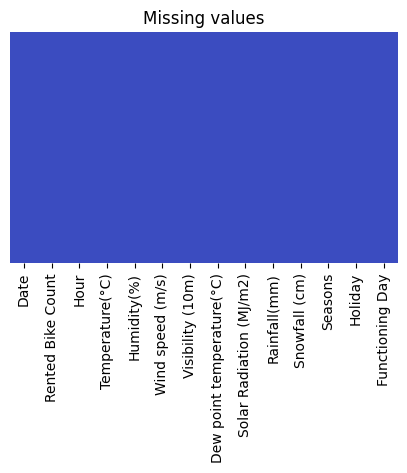

In [502]:
# Visualizing the missing values
missing_values = dataset.isnull()
plt.figure(figsize = (5,3))
sns.heatmap(missing_values,cmap='coolwarm',cbar=False, yticklabels=False)
plt.title('Missing values')
plt.show()

### What did you know about your dataset?

There are 8760(Rows) and 14(Columns). There is no null values. Dataset has all unique values, there is no duplicate in this dataset.
Date has object data type it should be datetime data type.

## ***2. Understanding Your Variables***

In [503]:
# Dataset Columns
dataset.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [504]:
# Dataset Describe
dataset.describe(include='all')

Date  Rented Bike Count         Hour  Temperature(°C)  \
count         8760        8760.000000  8760.000000      8760.000000   
unique         365                NaN          NaN              NaN   
top     01/12/2017                NaN          NaN              NaN   
freq            24                NaN          NaN              NaN   
mean           NaN         704.602055    11.500000        12.882922   
std            NaN         644.997468     6.922582        11.944825   
min            NaN           0.000000     0.000000       -17.800000   
25%            NaN         191.000000     5.750000         3.500000   
50%            NaN         504.500000    11.500000        13.700000   
75%            NaN        1065.250000    17.250000        22.500000   
max            NaN        3556.000000    23.000000        39.400000   

        Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
count   8760.000000       8760.000000       8760.000000   
unique          NaN               NaN               NaN   
top             NaN               NaN               NaN   
freq            NaN               NaN               NaN   
mean      58.226256          1.724909       1436.825799   
std       20.362413          1.036300        608.298712   
min        0.000000          0.000000         27.000000   
25%       42.000000          0.900000        940.000000   
50%       57.000000          1.500000       1698.000000   
75%       74.000000          2.300000       2000.000000   
max       98.000000          7.400000       2000.000000   

        Dew point temperature(°C)  Solar Radiation (MJ/m2)  Rainfall(mm)  \
count                 8760.000000              8760.000000   8760.000000   
unique                        NaN                      NaN           NaN   
top                           NaN                      NaN           NaN   
freq                          NaN                      NaN           NaN   
mean                     4.073813                 0.569111      0.148687   
std                     13.060369                 0.868746      1.128193   
min                    -30.600000                 0.000000      0.000000   
25%                     -4.700000                 0.000000      0.000000   
50%                      5.100000                 0.010000      0.000000   
75%                     14.800000                 0.930000      0.000000   
max                     27.200000                 3.520000     35.000000   

        Snowfall (cm) Seasons     Holiday Functioning Day  
count     8760.000000    8760        8760            8760  
unique            NaN       4           2               2  
top               NaN  Spring  No Holiday             Yes  
freq              NaN    2208        8328            8465  
mean         0.075068     NaN         NaN             NaN  
std          0.436746     NaN         NaN             NaN  
min          0.000000     NaN         NaN             NaN  
25%          0.000000     NaN         NaN             NaN  
50%          0.000000     NaN         NaN             NaN  
75%          0.000000     NaN         NaN             NaN  
max          8.800000     NaN         NaN             NaN

### Variables Description

1 - Date - year-month-day

2 - Rented Bike count - Count of bikes rented at each hour

3 - Hour - Hour of the day

4 - Temperature - Temperature in Celsius

5 - Humidity - %

6 - Windspeed - m/s

7 - Visibility - 10m

8 - Dew point temperature - Celsius

9 - Solar radiation - MJ/m2

10 - Rainfall - mm

11 - Snowfall - cm

12 - Seasons - Winter, Spring, Summer, Autumn

13 - Holiday - Holiday/No holiday

14 - Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [505]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique())

No. of unique values in  Date is 365
No. of unique values in  Rented Bike Count is 2166
No. of unique values in  Hour is 24
No. of unique values in  Temperature(°C) is 546
No. of unique values in  Humidity(%) is 90
No. of unique values in  Wind speed (m/s) is 65
No. of unique values in  Visibility (10m) is 1789
No. of unique values in  Dew point temperature(°C) is 556
No. of unique values in  Solar Radiation (MJ/m2) is 345
No. of unique values in  Rainfall(mm) is 61
No. of unique values in  Snowfall (cm) is 51
No. of unique values in  Seasons is 4
No. of unique values in  Holiday is 2
No. of unique values in  Functioning Day is 2


## 3. ***Data Wrangling***

### Data Wrangling Code

In [506]:
# Write your code to make your dataset analysis ready.
df1 = dataset.copy()

In [507]:
df1 = df1.rename(columns={'Rented Bike Count' : 'rented_Bike_count',
                        'Temperature(°C)':'Temperature',
                        'Humidity(%)' : 'Humidity',
                        'Wind speed (m/s)' : 'Wind_speed',
                        'Visibility (10m)' : 'Visibility',
                        'Dew point temperature(°C)' : 'Dew_point_temperature',
                        'Solar Radiation (MJ/m2)' : 'Solar_Radiation',
                        'Rainfall(mm)' : 'Rainfall',
                        'Snowfall (cm)' : 'Snowfall',
                        'Functioning Day' : 'Functioning_Day'})

In [508]:
df1['Date'] = df1['Date'].apply(lambda x: dt.strptime(x,'%d/%m/%Y'))

In [509]:
df1['month'] = df1['Date'].apply(lambda x : x.month)
df1['year'] = df1['Date'].apply(lambda x : x.year)
df1['Week_days'] = df1['Date'].apply(lambda x : x.isoweekday())

In [510]:
df1['weekend'] = df1['Week_days'].apply(lambda x: 1 if x>5 else 0)

In [511]:
df1 = df1.drop(columns = 'Date',axis=1)

In [512]:
pd.set_option('display.max_columns',None)
df1.head()

rented_Bike_count  Hour  Temperature  Humidity  Wind_speed  Visibility  \
0                254     0         -5.2        37         2.2        2000   
1                204     1         -5.5        38         0.8        2000   
2                173     2         -6.0        39         1.0        2000   
3                107     3         -6.2        40         0.9        2000   
4                 78     4         -6.0        36         2.3        2000   

   Dew_point_temperature  Solar_Radiation  Rainfall  Snowfall Seasons  \
0                  -17.6              0.0       0.0       0.0  Winter   
1                  -17.6              0.0       0.0       0.0  Winter   
2                  -17.7              0.0       0.0       0.0  Winter   
3                  -17.6              0.0       0.0       0.0  Winter   
4                  -18.6              0.0       0.0       0.0  Winter   

      Holiday Functioning_Day  month  year  Week_days  weekend  
0  No Holiday             Yes     12  2017          5        0  
1  No Holiday             Yes     12  2017          5        0  
2  No Holiday             Yes     12  2017          5        0  
3  No Holiday             Yes     12  2017          5        0  
4  No Holiday             Yes     12  2017          5        0

### What all manipulations have you done and insights you found?

I've segmented the date column into separate columns for month, and year,
week_days. The 'day' column contains detailed information for each day of the month. To simplify the dataset, I'm converting this information to distinguish between weekdays and weekends and then removing the original 'date' column.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
dependent_variable = ['rented_Bike_count']

<Axes: xlabel='rented_Bike_count', ylabel='Density'>

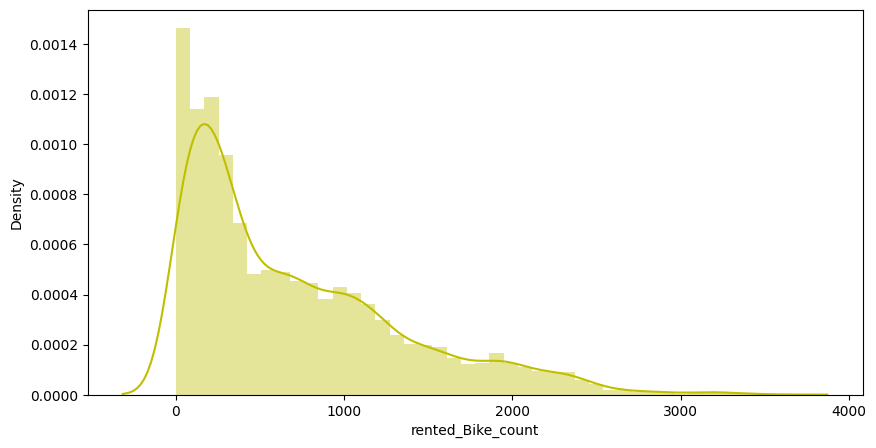

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10,5))
sns.distplot(df1['rented_Bike_count'], color='y')

##### 1. Why did you pick the specific chart?

I used distplot to check the data destribution of the dependent variable(rented_Bike_count).

##### 2. What is/are the insight(s) found from the chart?

The dependent variable('rented_Bike_count') is  positively skewed.To get the better prediction,It is ideal if the dependent variable should be normally distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, if a variable is skewed, it can lead to bias predictions, influence the mean and median, and potentially affect model assumptions.

#### Chart - 2

<Axes: xlabel='rented_Bike_count', ylabel='Density'>

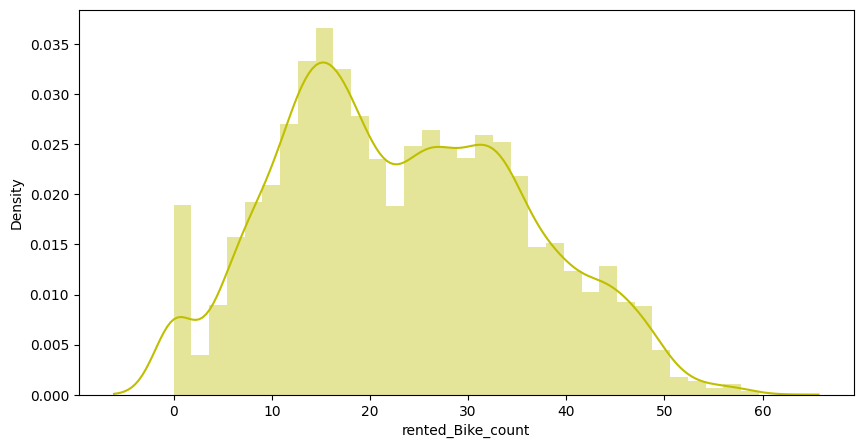

In [ ]:
# Chart - 2 visualization code
plt.figure(figsize=(10,5))
sns.distplot(np.sqrt(df1['rented_Bike_count']), color='y')

##### 1. Why did you pick the specific chart?

In chart1, I observed some skewness in the dependent variable ('rented_Bike_count'). Therefore, I wanted to apply np.sqrt to see whether it can make my data normally distributed or not.

##### 2. What is/are the insight(s) found from the chart?

After applying np.sqrt i was able to reduce the skewness.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,i can use np.sqrt while implementing the models.

#### Chart - 3

<Axes: xlabel='rented_Bike_count', ylabel='Density'>

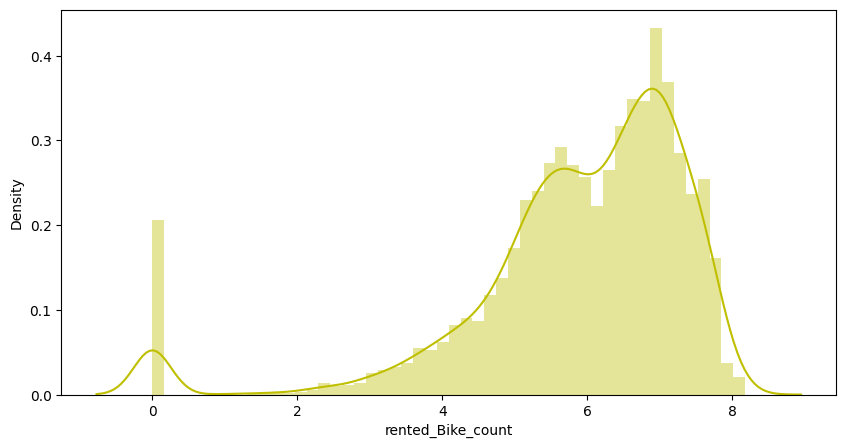

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10,5))
sns.distplot(np.log1p(df1['rented_Bike_count']), color='y')

##### 1. Why did you pick the specific chart?

I observed some skewness in the dependent variable ('rented_Bike_count'). Therefore, I wanted to compare the effects of using np.log1p and np.sqrt to see which one works better on our dataset.

##### 2. What is/are the insight(s) found from the chart?

 We can clearly see that np.sqrt performs better on the data compared to np.log1p.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, np.sqrt will help in making more accurate assumptions compared to np.log1p.

#### Chart - 4

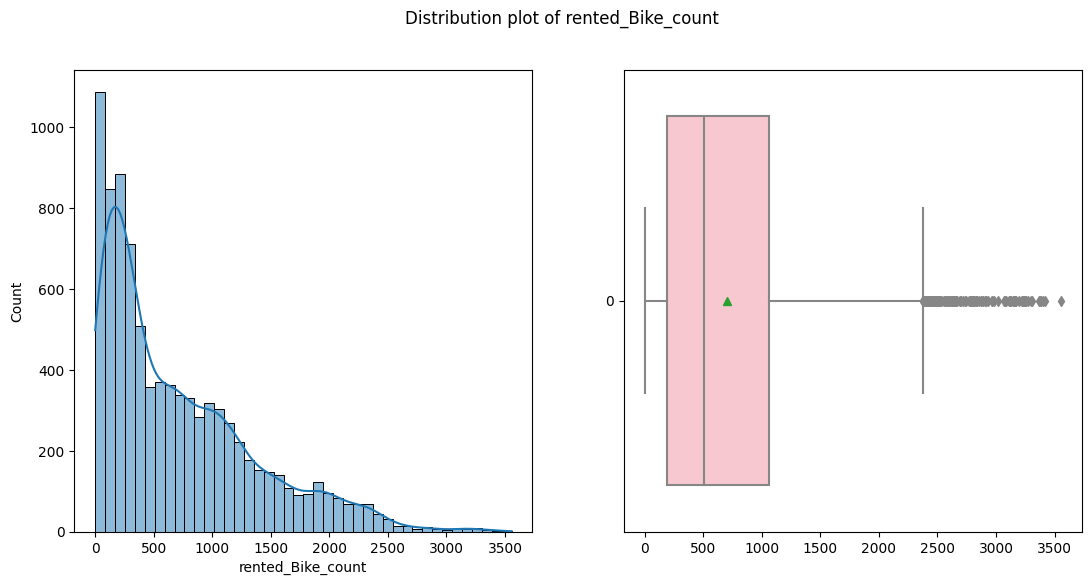

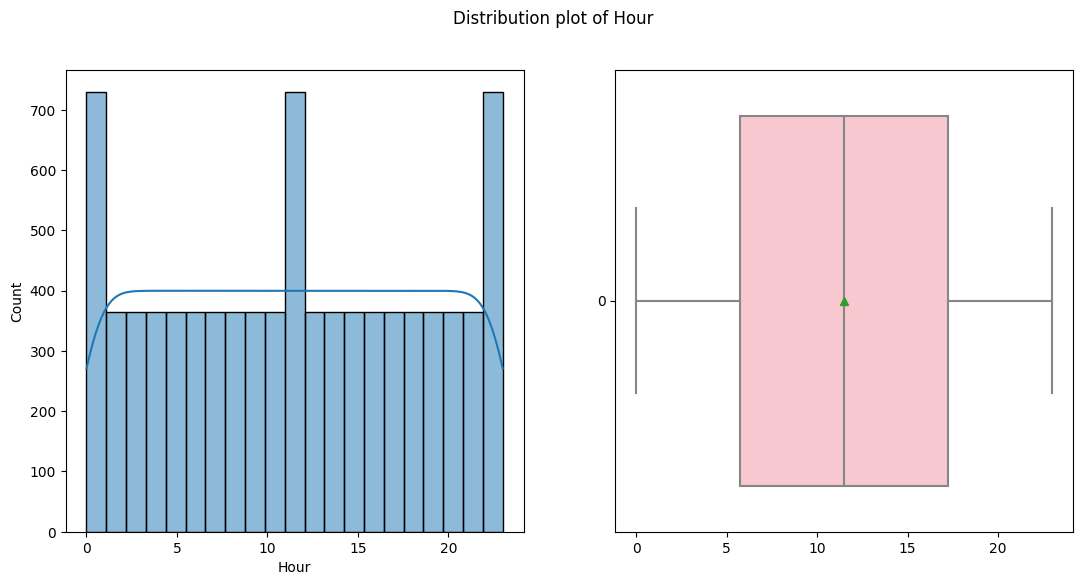

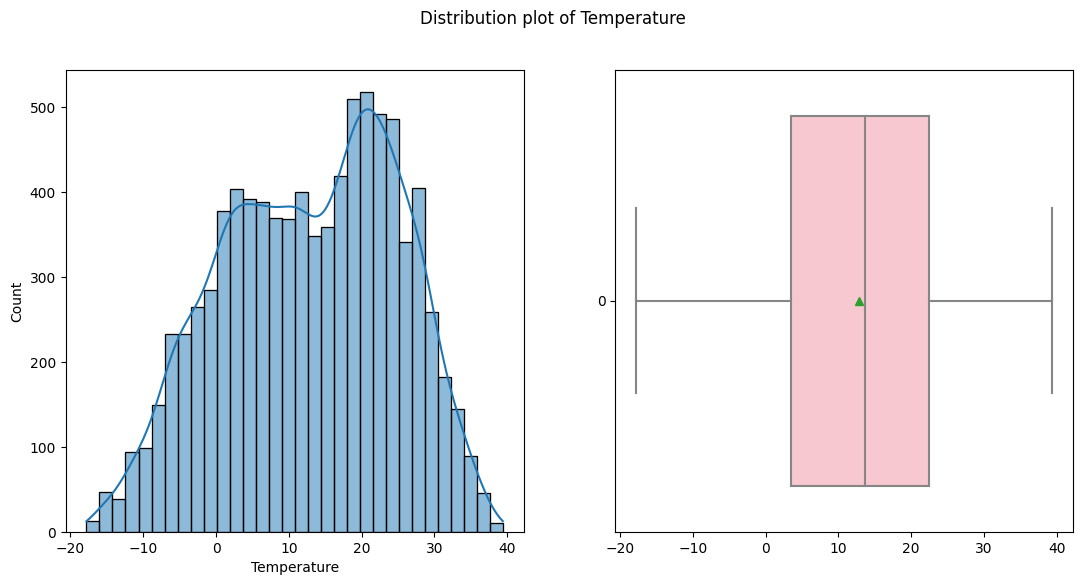

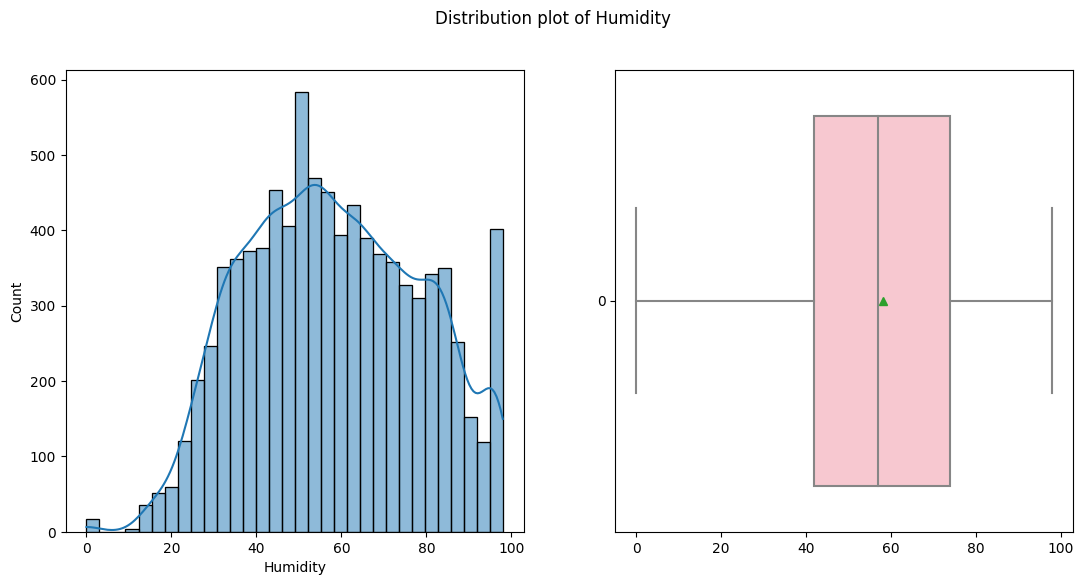

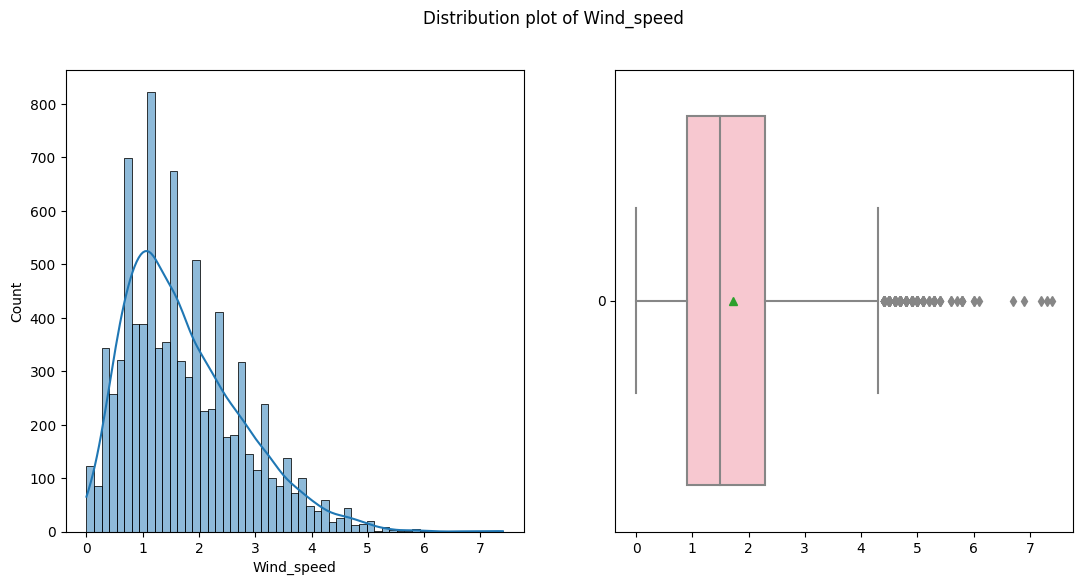

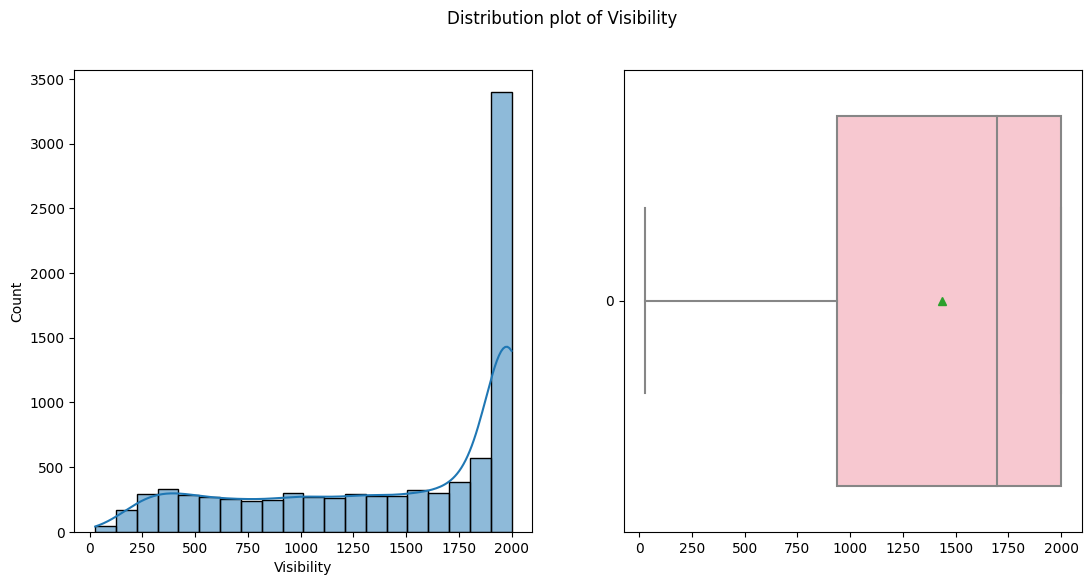

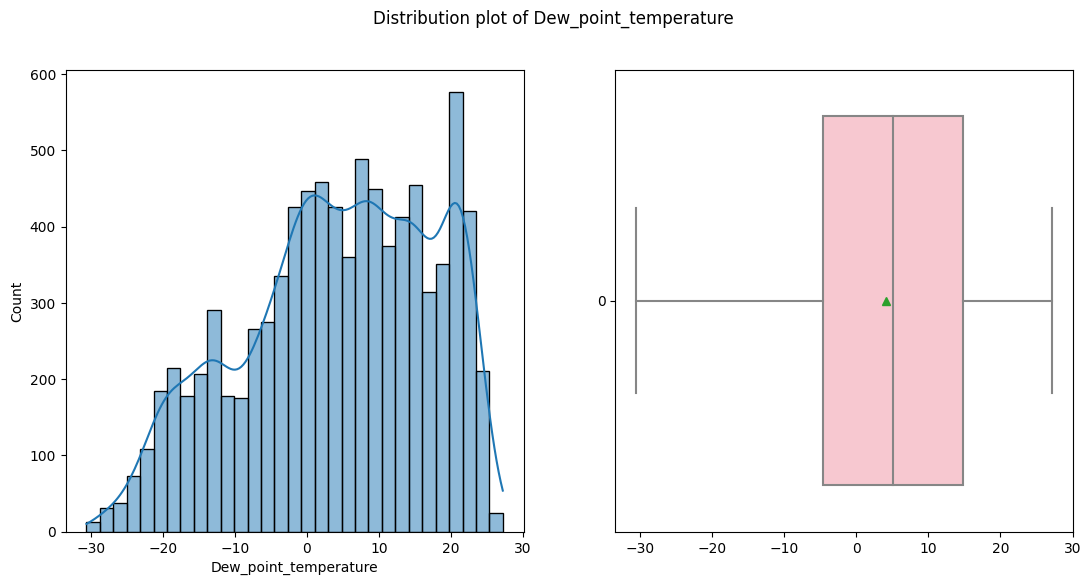

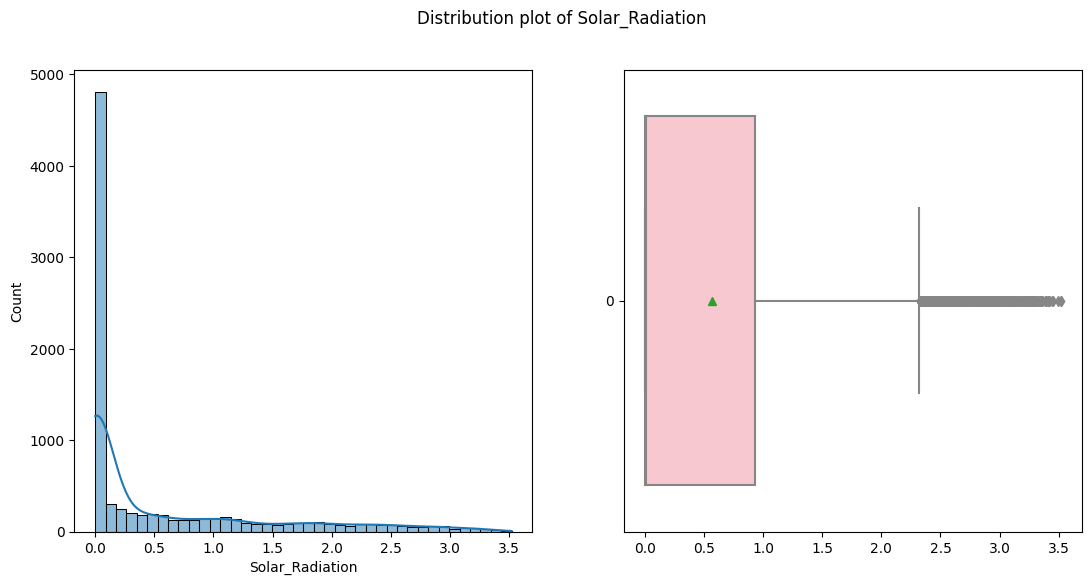

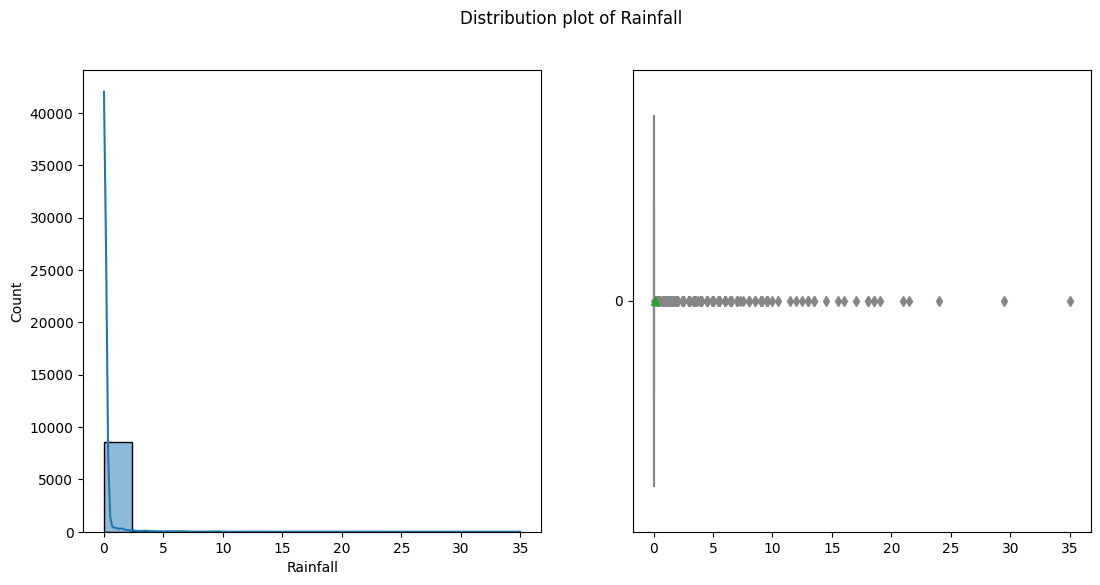

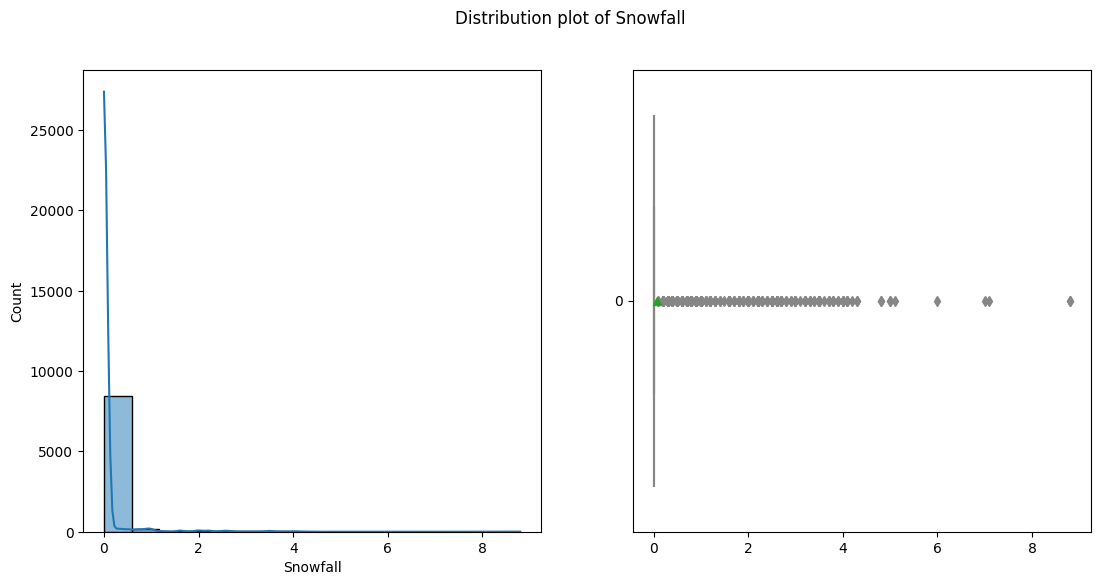

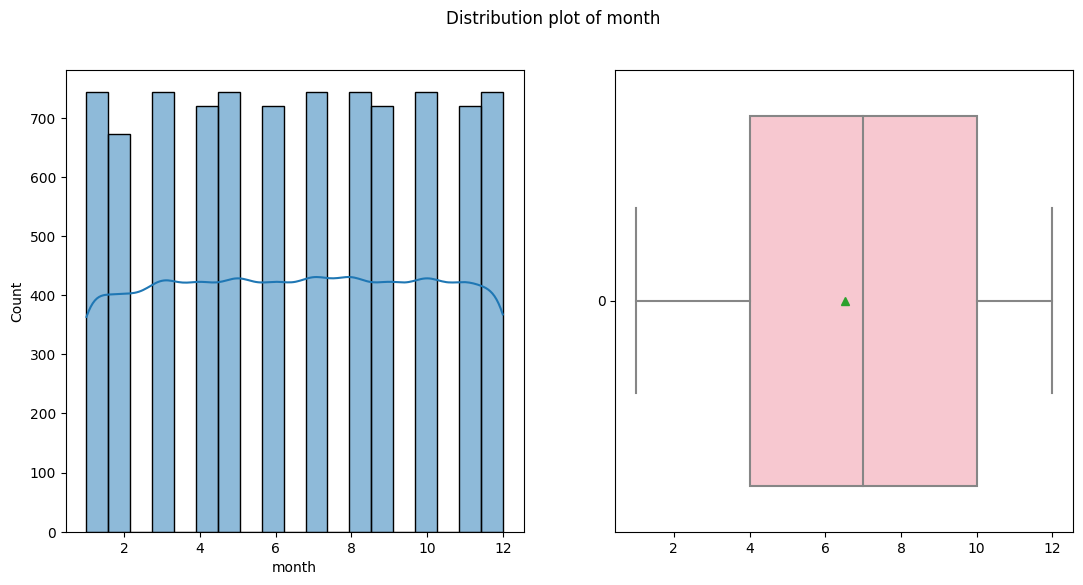

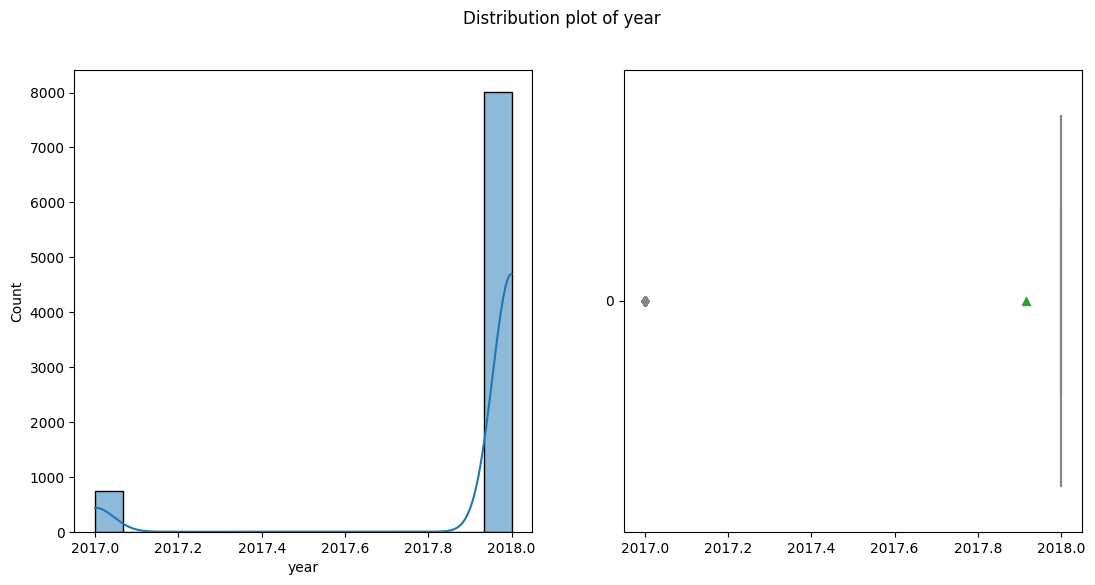

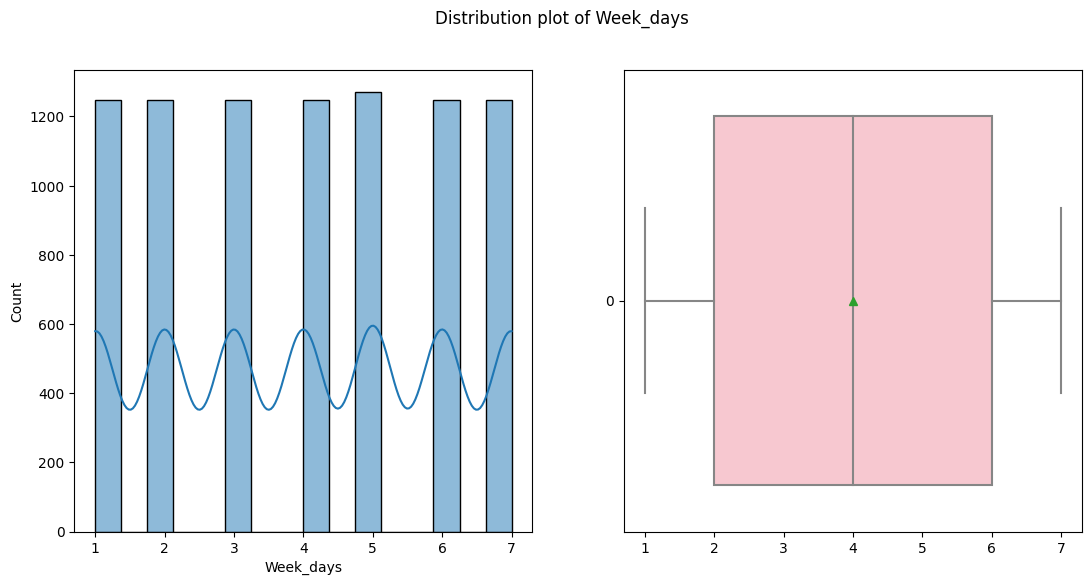

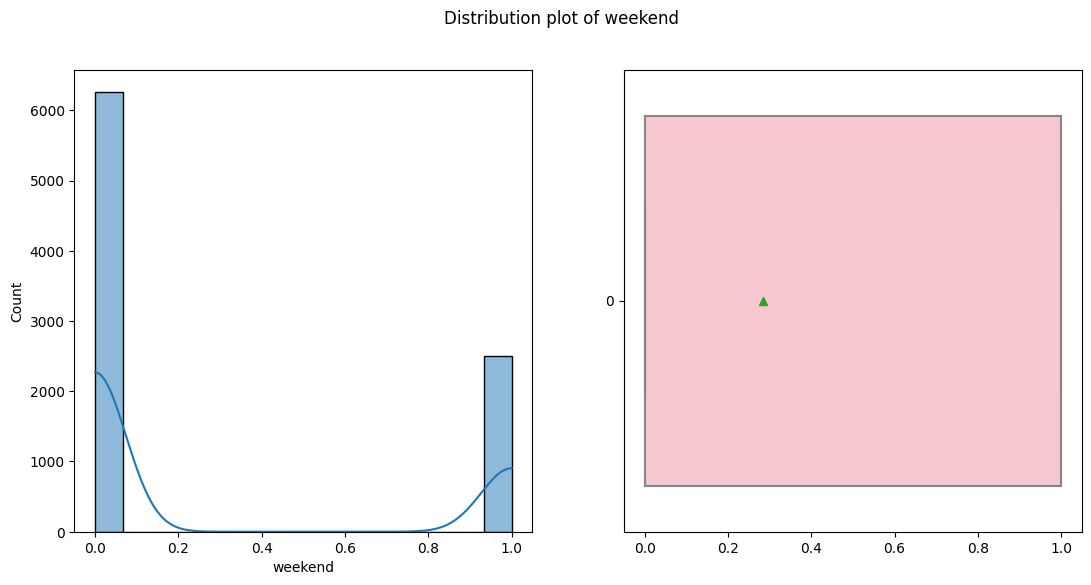

In [ ]:
# Chart - 4 visualization code
for cols in df1.describe().columns:
    fig,axes = plt.subplots(nrows = 1,ncols = 2,figsize=(13,6))
    sns.histplot(df1[cols], ax = axes[0],kde = True)
    sns.boxplot(df1[cols], ax = axes[1],orient='h',showmeans = True,color='pink')
    fig.suptitle("Distribution plot of " + cols, fontsize = 12)
    plt.show()

##### 1. Why did you pick the specific chart?

Here, I used a boxplot to check for outliers in my dataset because outliers can lead to incorrect assumptions.

##### 2. What is/are the insight(s) found from the chart?

There are some outliers in my data.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,beacuse outliers can significantly impact a model's performance, influencing its accuracy, bias, variance, adherence to model assumptions, and the overall robustness of the model. Handling outliers appropriately is crucial to ensure the model's reliability in making predictions.

#### Chart - 5

In [ ]:
Categorical_var = ['Hour','Seasons', 'Holiday', 'Functioning_Day', 'month', 'weekend']

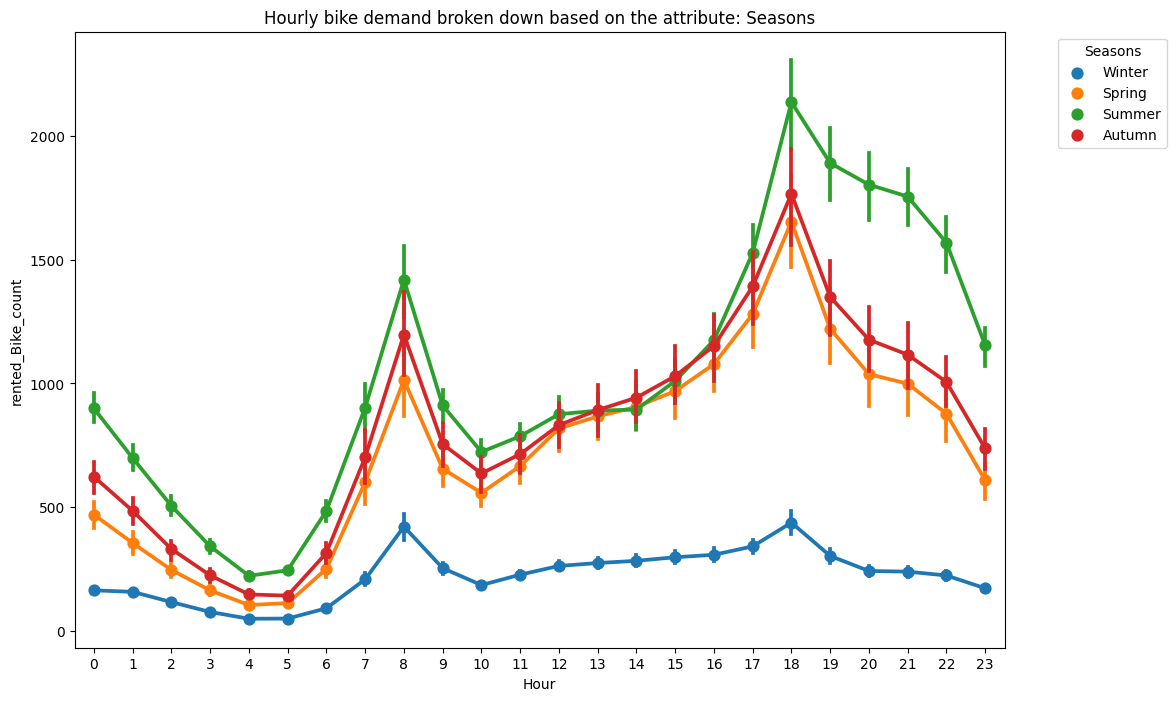

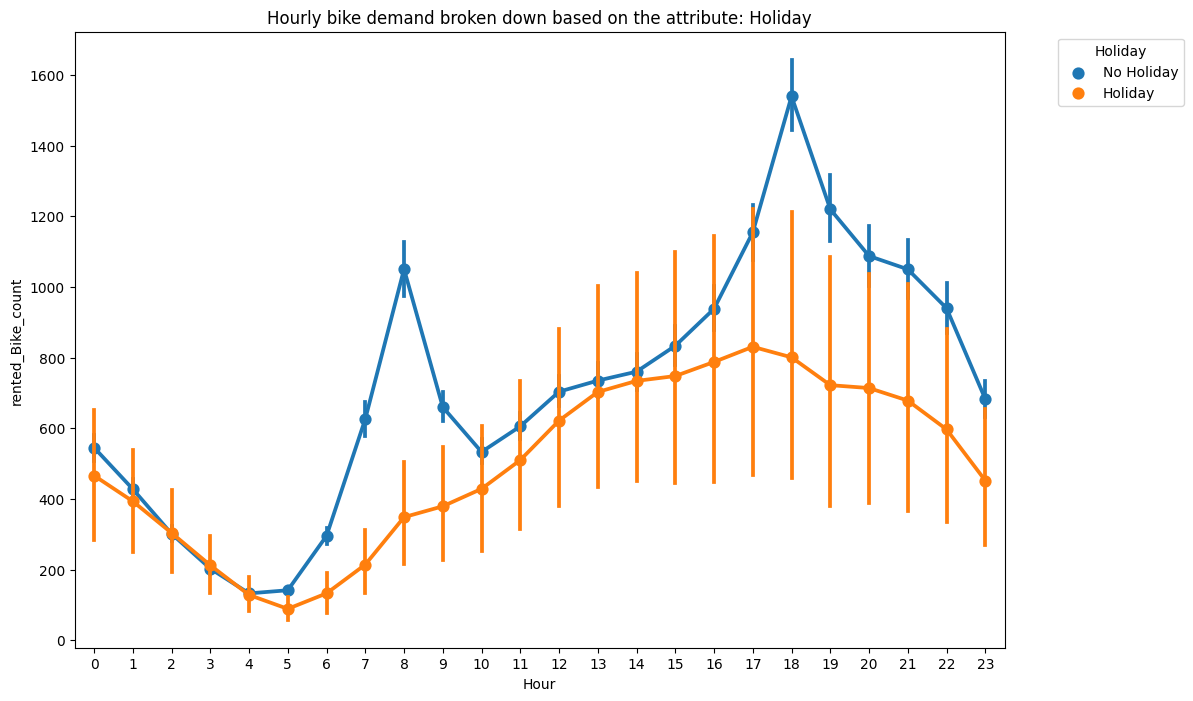

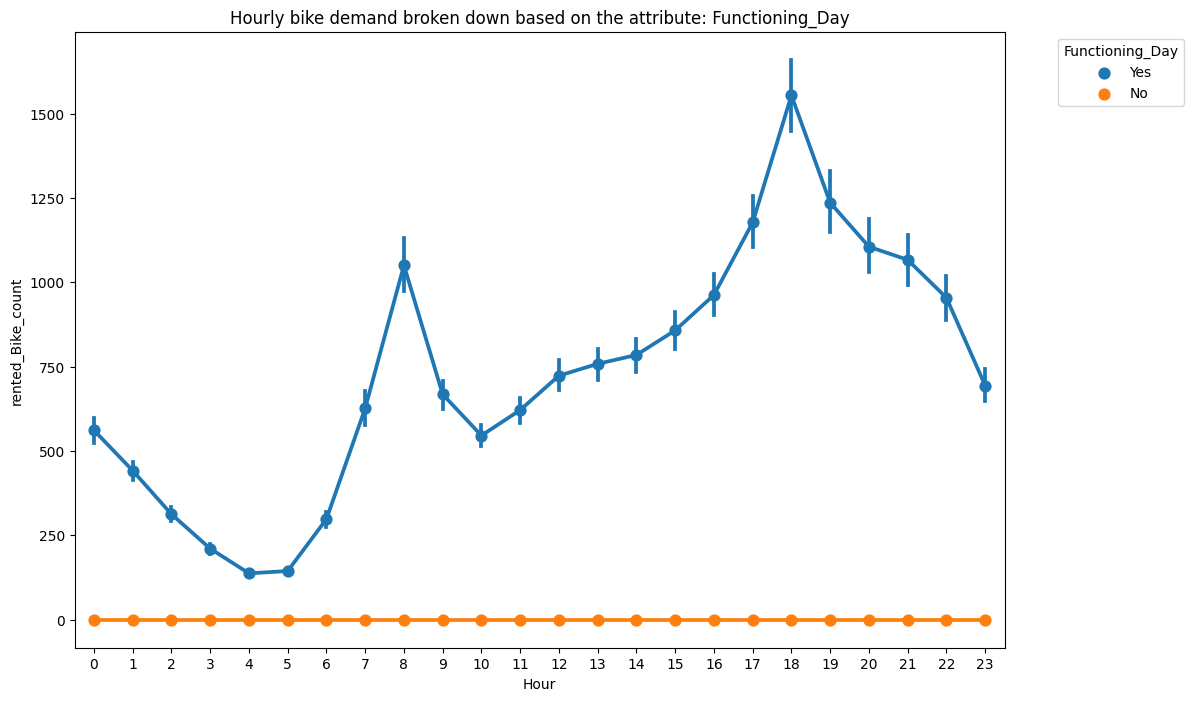

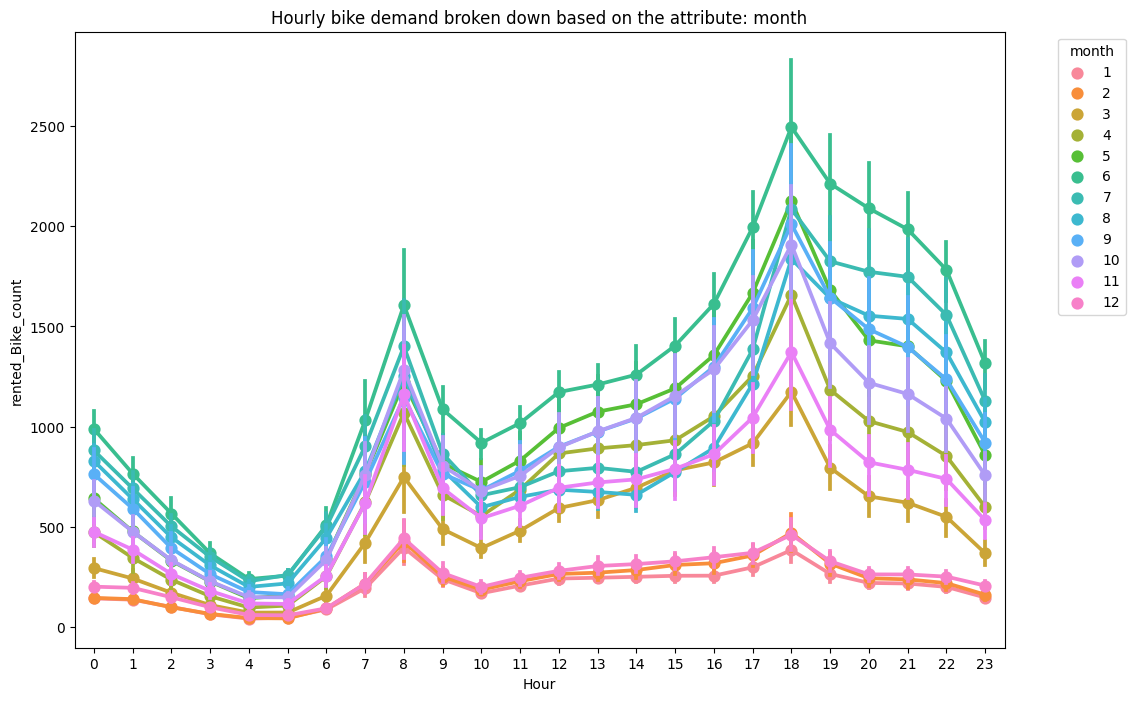

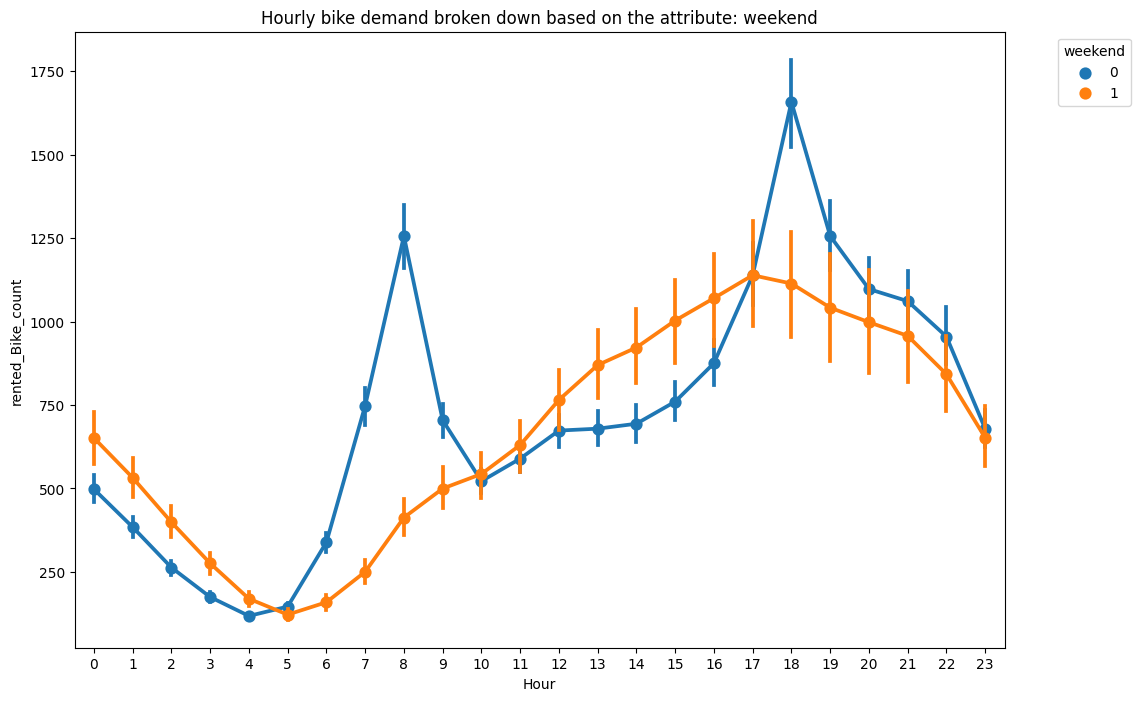

In [ ]:
# Chart - 5 visualization code
for i in Categorical_var:
  if i == 'Hour':
    continue
  else:
    fig, ax = plt.subplots(figsize=(12,8))
    sns.pointplot(data=df1, x='Hour', y='rented_Bike_count', hue=i, ax=ax)
    plt.title('Hourly bike demand broken down based on the attribute: '+i)
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title=i)
    plt.show()

##### 1. Why did you pick the specific chart?

Line plots are excellent for visualizing trends within a dataset. They allow easy identification of increasing, decreasing, or cyclical patterns over time or across a series of data points.

##### 2. What is/are the insight(s) found from the chart?


During the winter season, demand remains relatively consistent throughout the day, showing no significant fluctuations in both morning and evening periods. However, on functional workdays (non-holidays), there's a noticeable surge in demand during both morning and evening hours. Interestingly, this demand spike isn't observed on holidays.

Specifically, for about three months encompassing the winter season (December, January, and February), the demand experiences a notable decrease. This period consistently registers lower demand

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,we can understand that there's a noticeable surge in
 functional_day demand during both morning and evening hours.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
numeric_features = df1.describe().columns[1:]

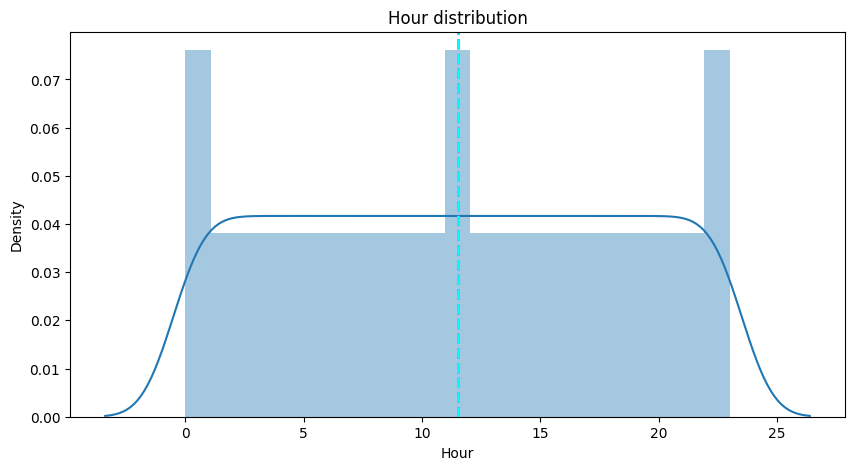

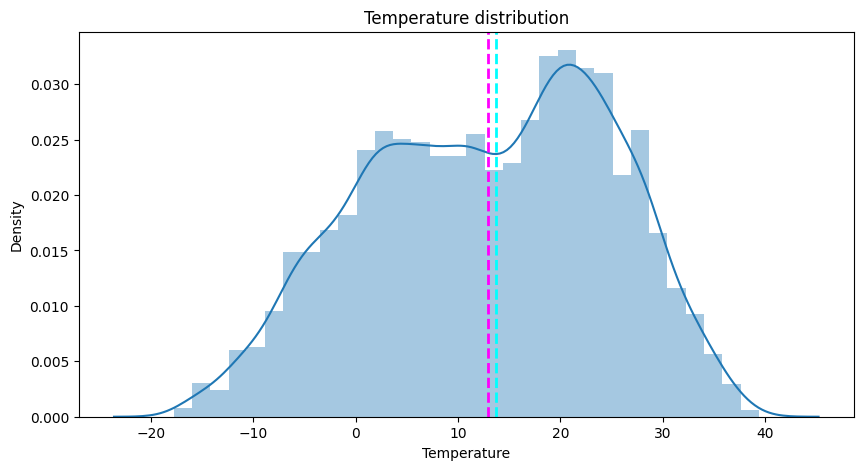

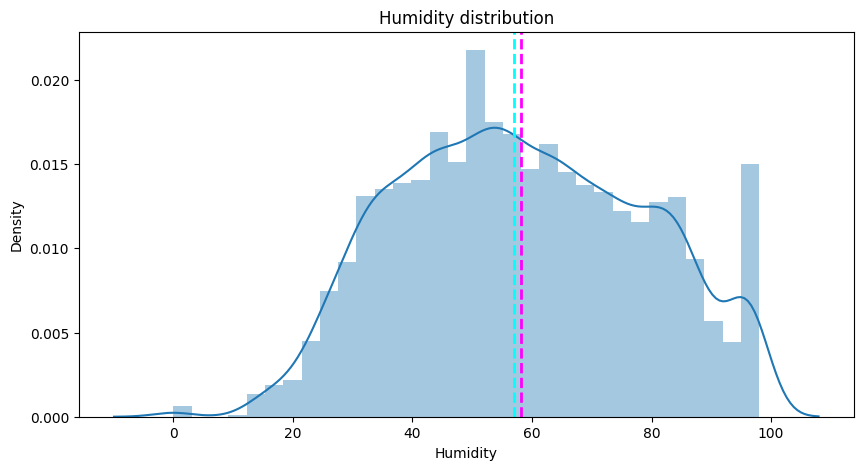

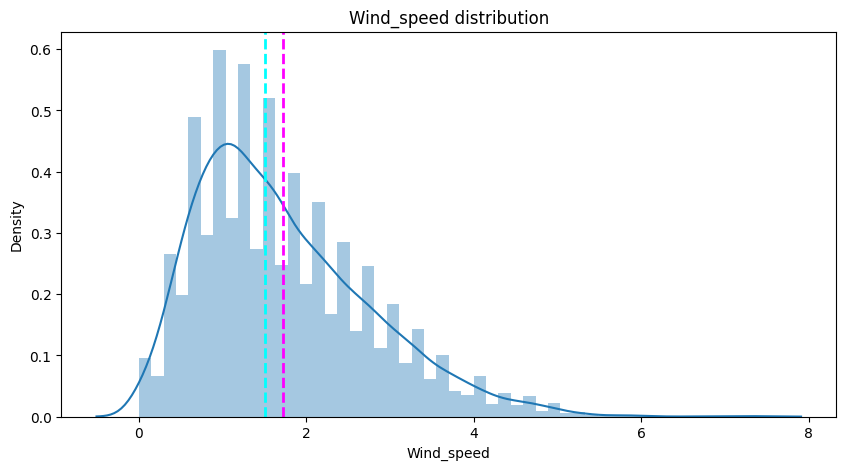

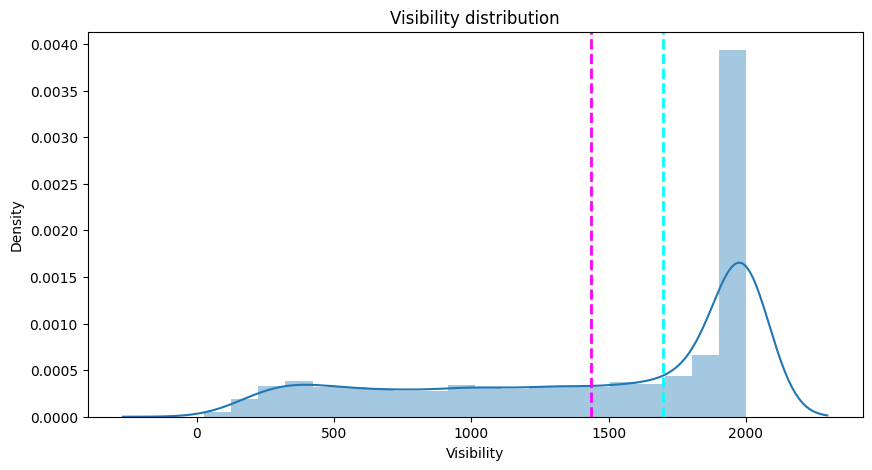

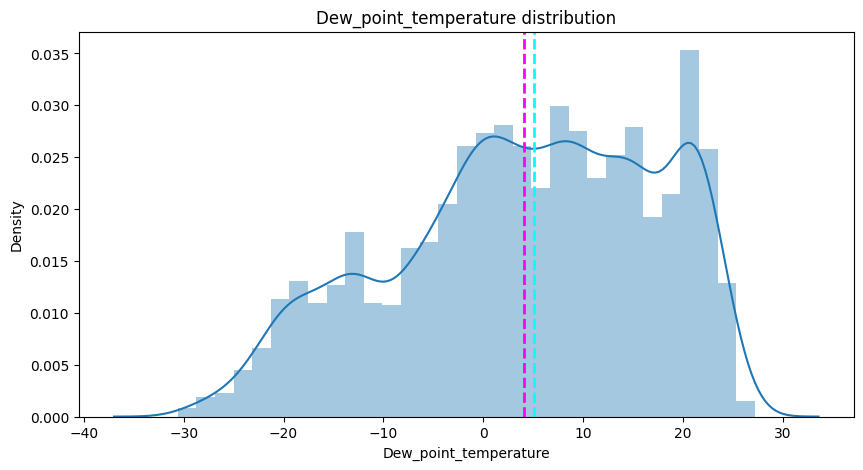

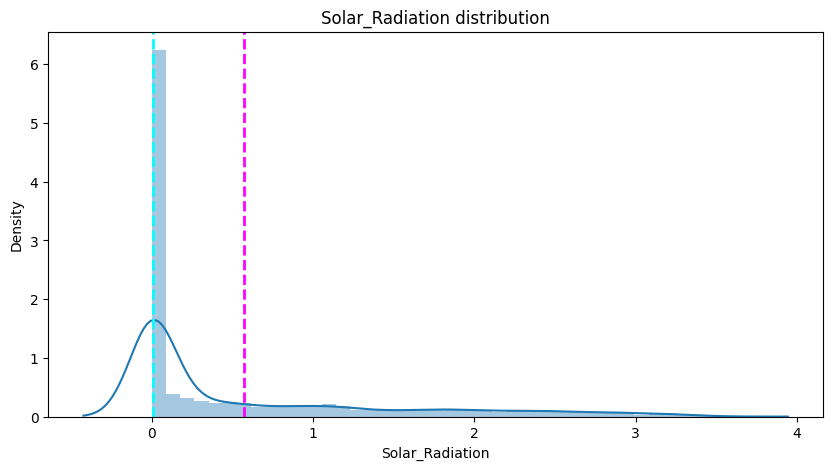

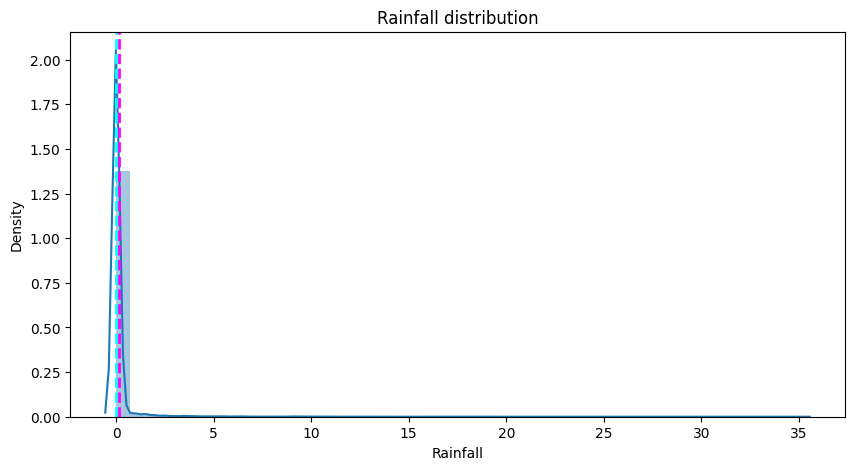

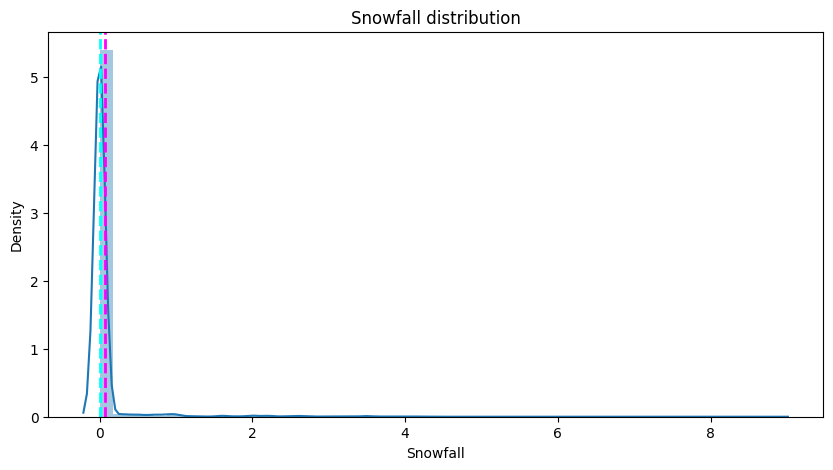

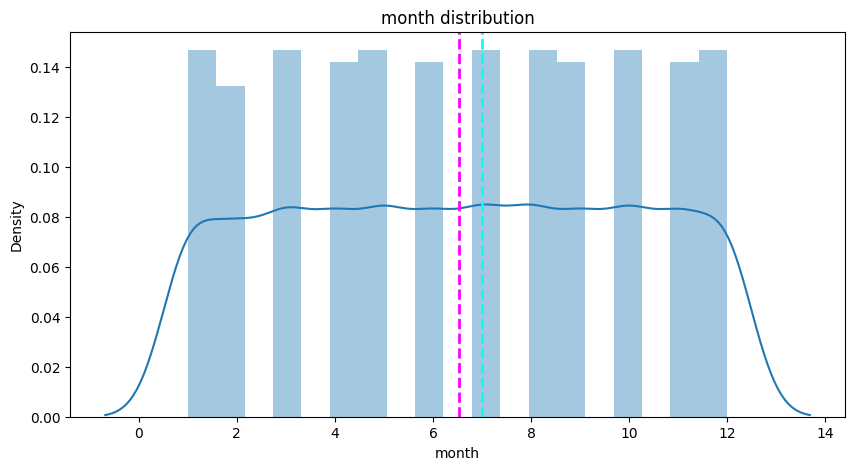

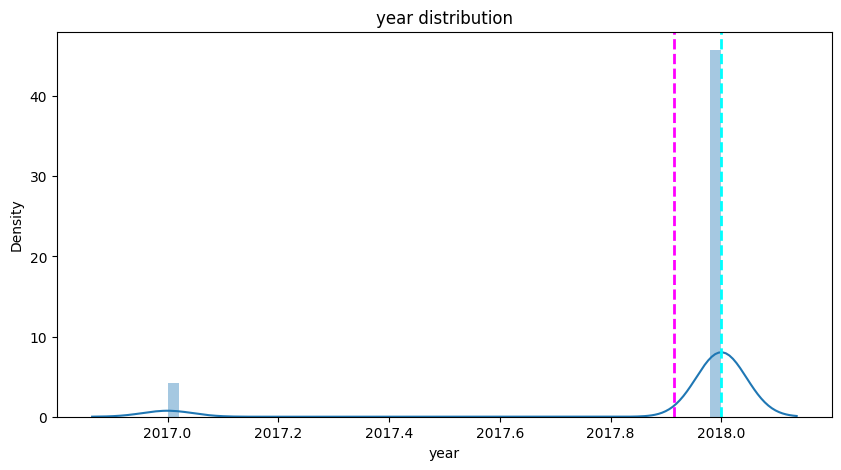

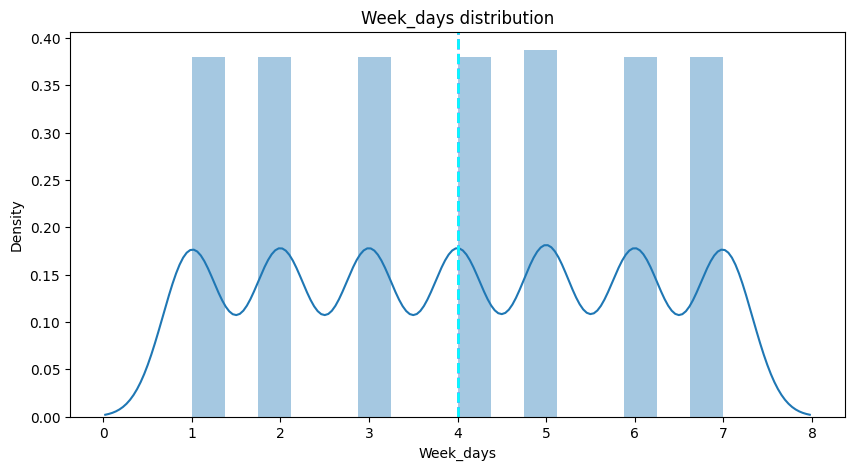

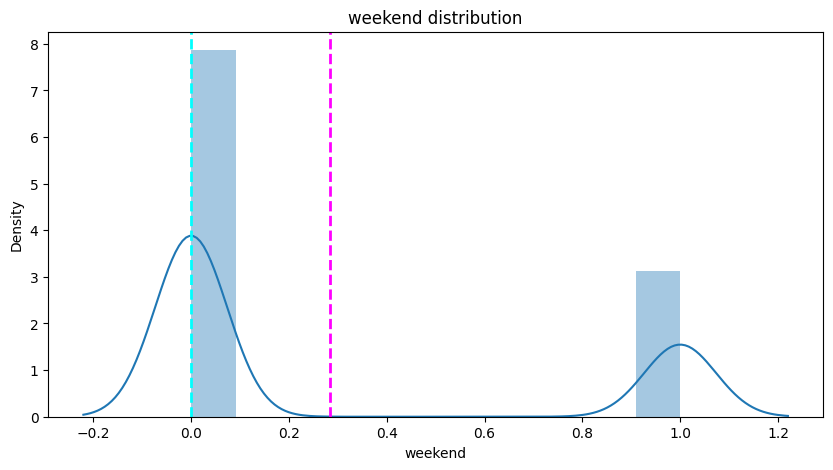

In [ ]:
for col in numeric_features:
  plt.figure(figsize=(10,5))
  sns.distplot(df1[col])
  plt.axvline(df1[col].mean(), color='magenta', linestyle='dashed', linewidth=2)
  plt.axvline(df1[col].median(), color='cyan', linestyle='dashed', linewidth=2)
  plt.title(col + ' distribution')
  plt.show()

##### 1. Why did you pick the specific chart?

Here, I used a distplot to check the distribution of the dataset to determine whether it's normally distributed or not.

##### 2. What is/are the insight(s) found from the chart?

The are some columns that are not normally distributed.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, because some columns (temperature, humidity, Dew point temperature) are normally distributed, while others are positively or negatively skewed, we need to address these columns before implementing any models.

#### Chart - 7

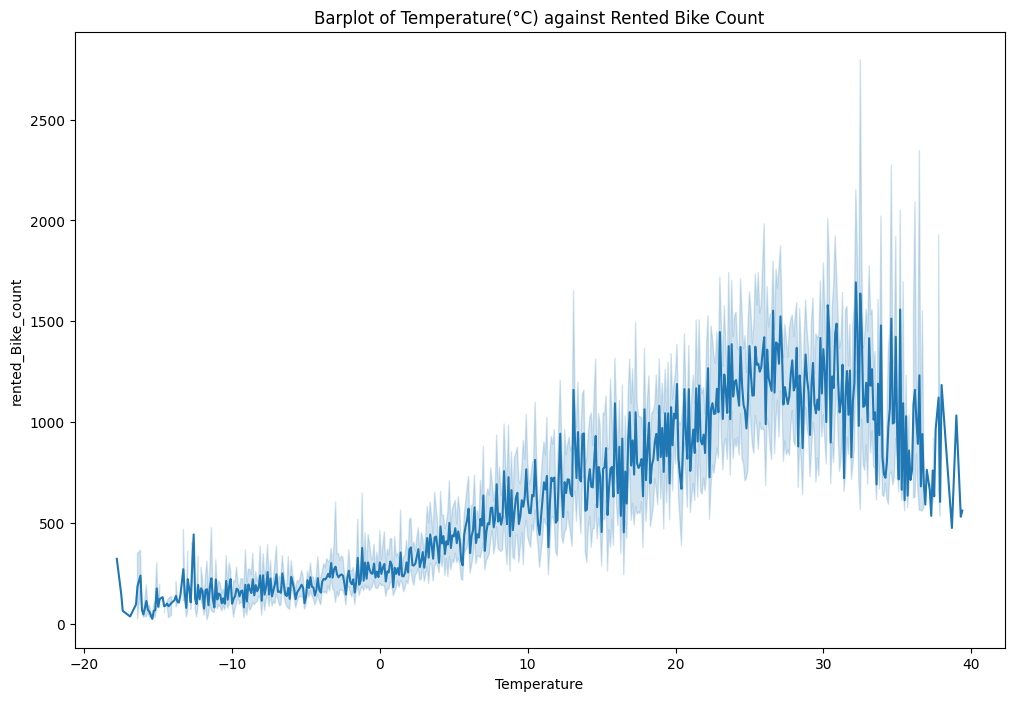

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(12,8))
ax=sns.lineplot(x="Temperature", y="rented_Bike_count",data=df1)
ax.set_title('Barplot of Temperature(°C) against Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

To check if temperature can impact rented bike counts or not.

##### 2. What is/are the insight(s) found from the chart?

It's evident that lower temperatures correlated with a decrease in rented bike counts

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definitely, it can help us, as it's crucial to consider before making any decisions, and it can also contribute to positive business growth.

#### Chart - 8

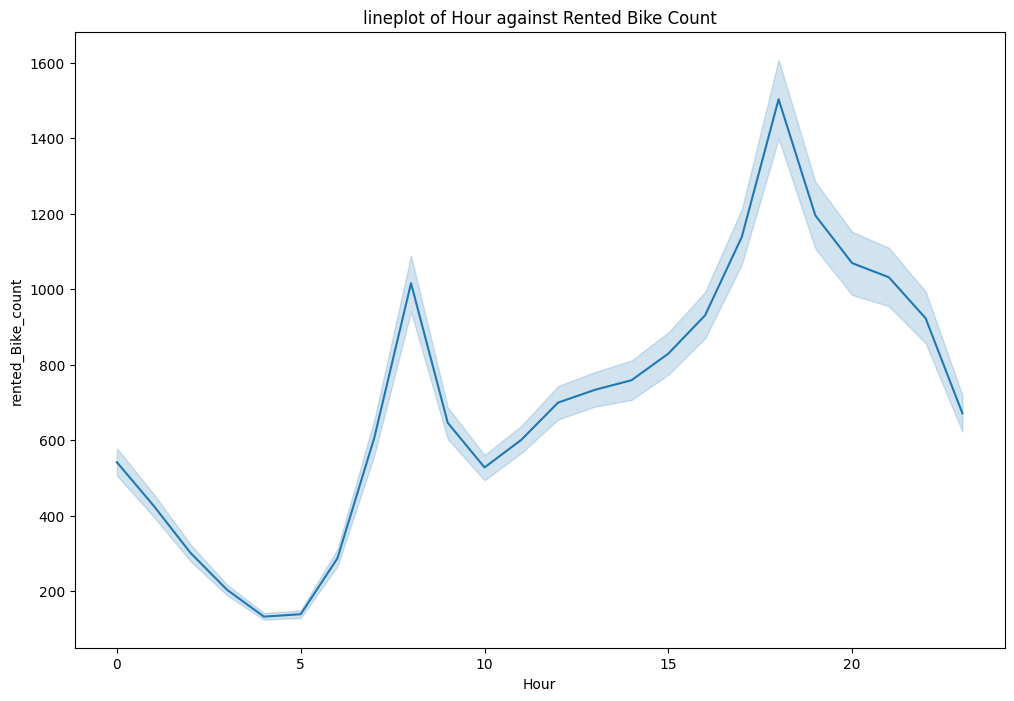

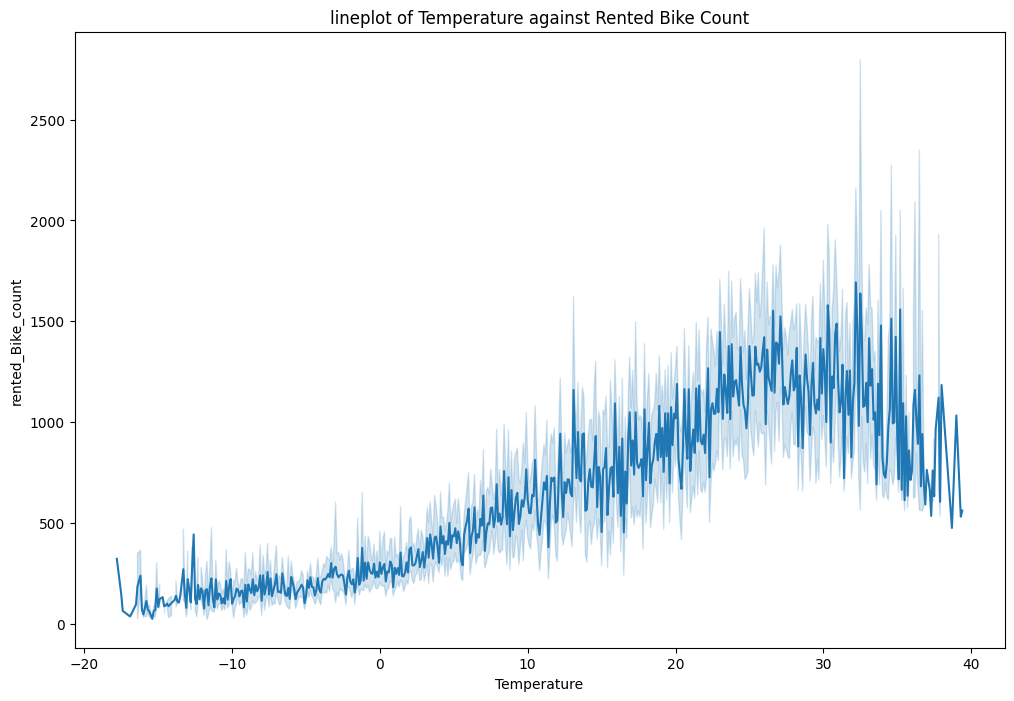

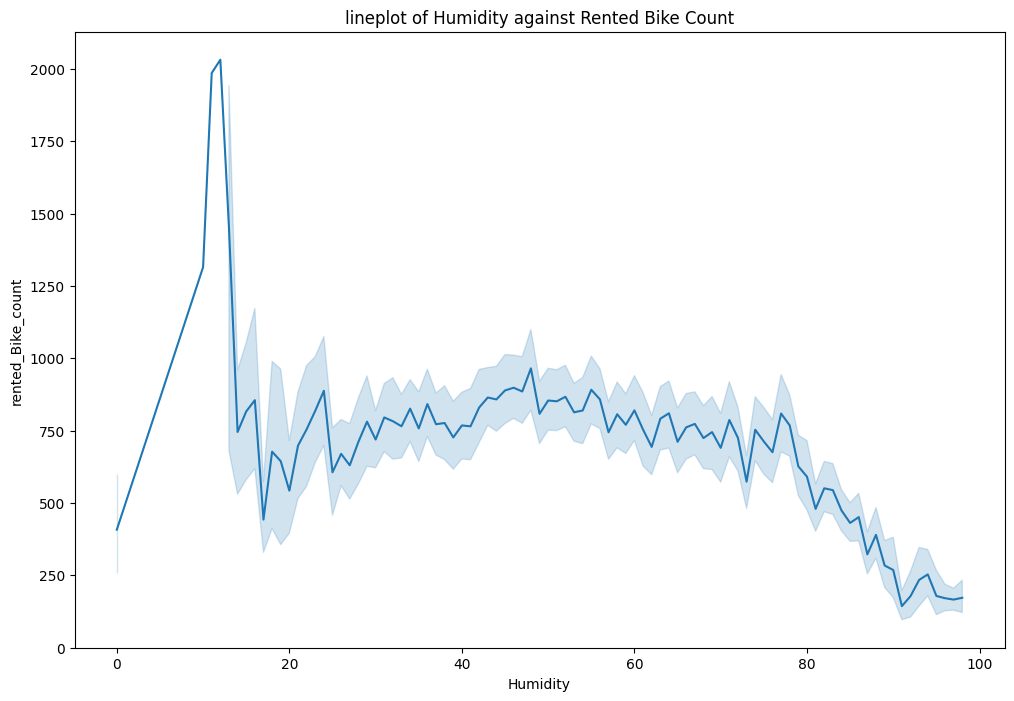

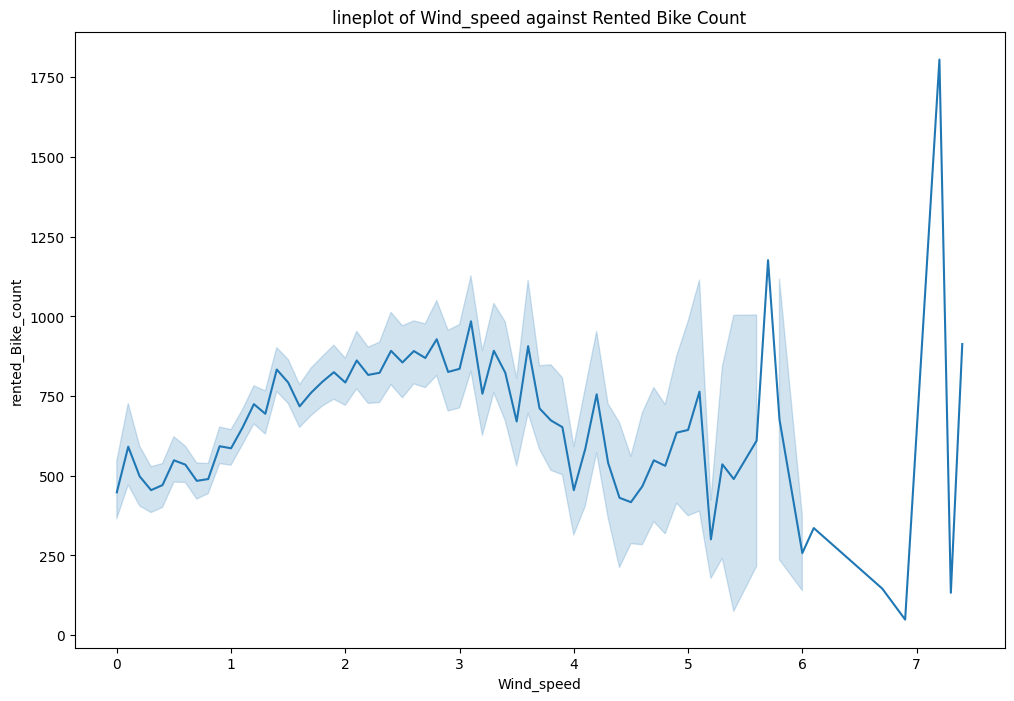

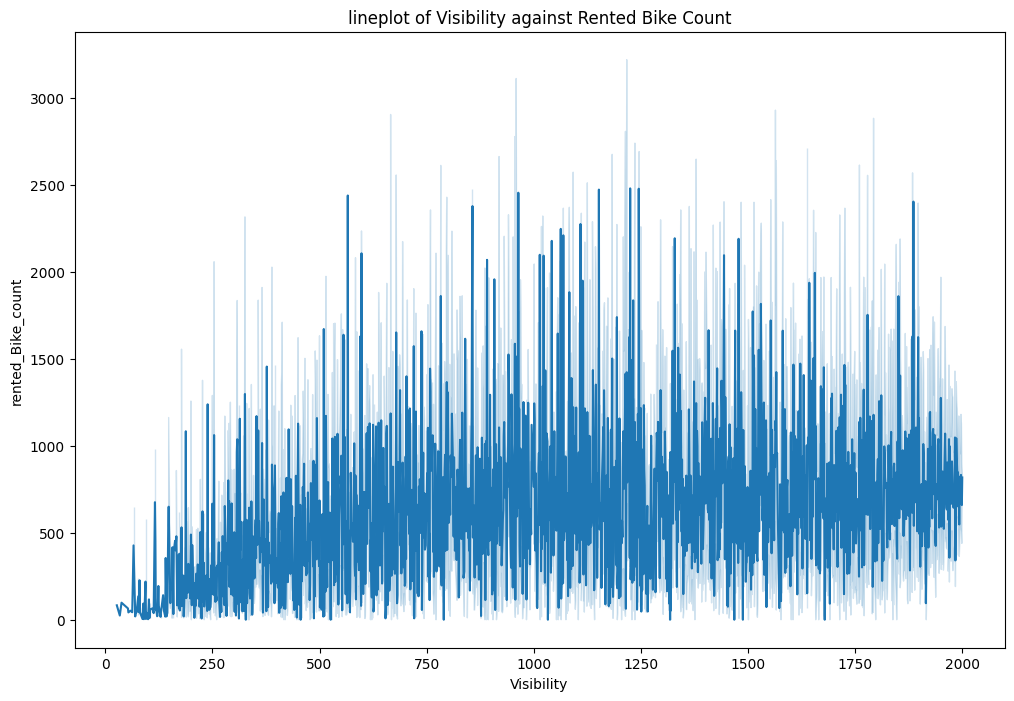

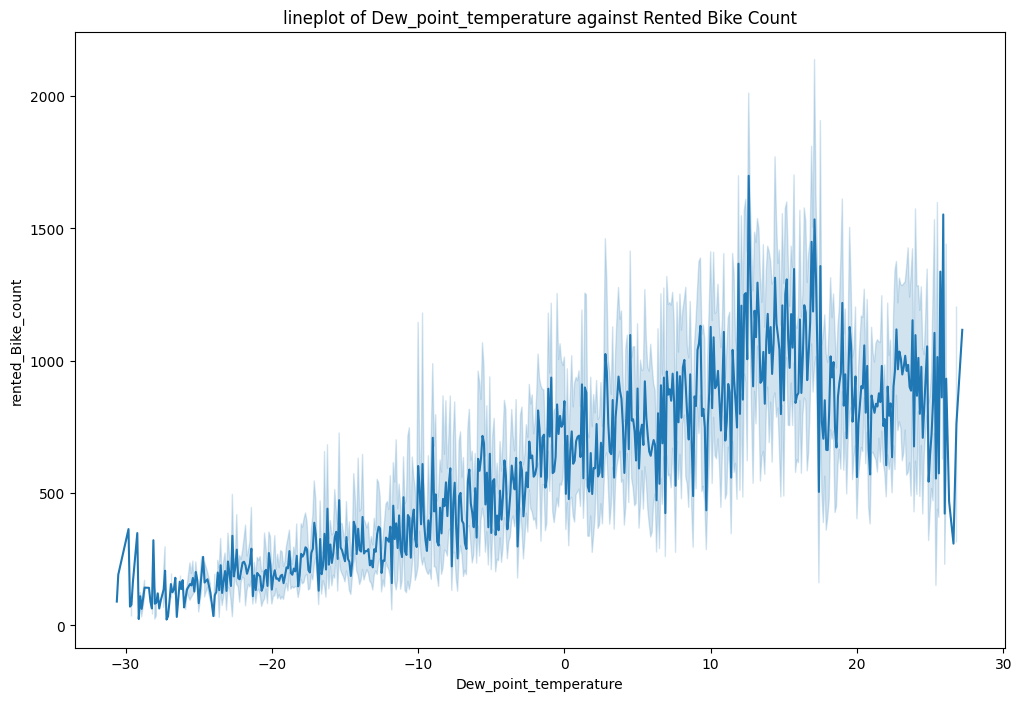

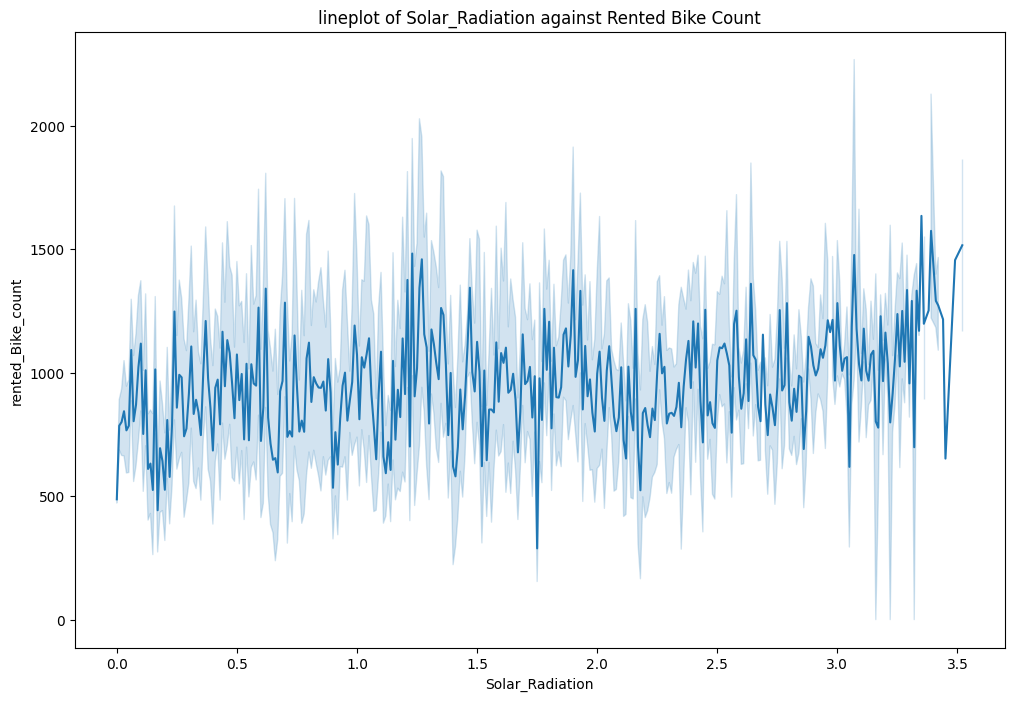

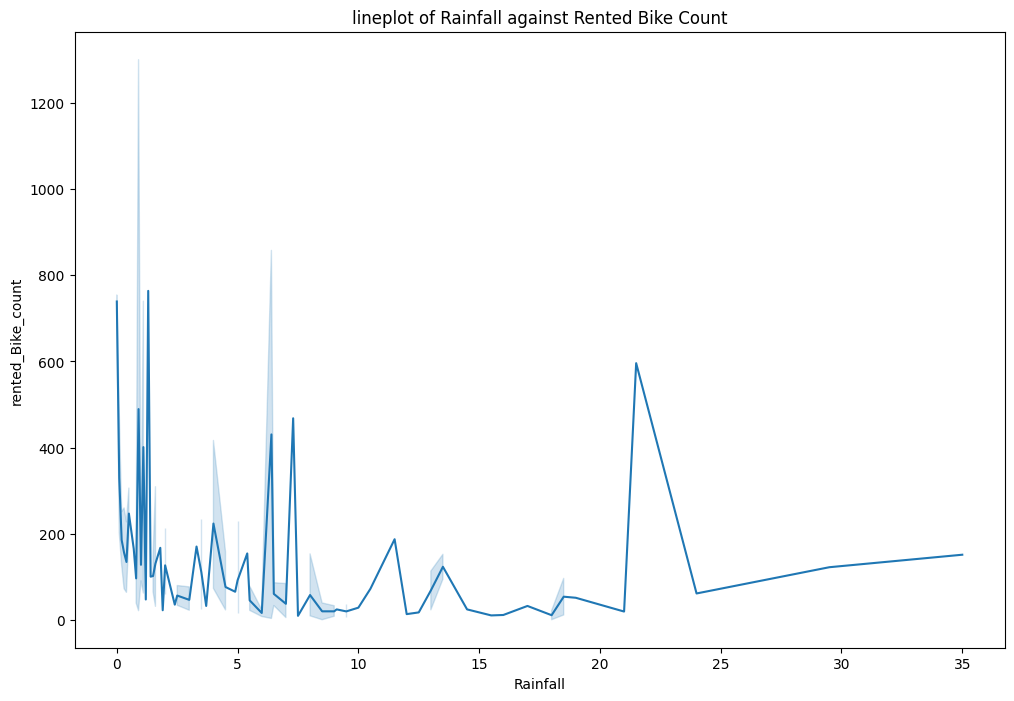

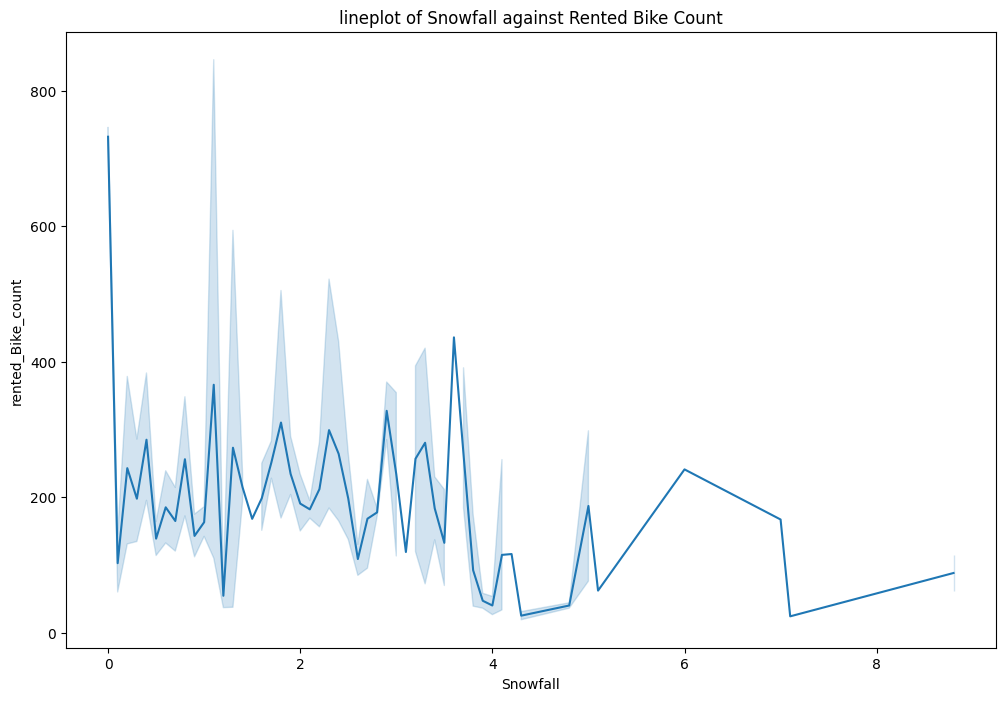

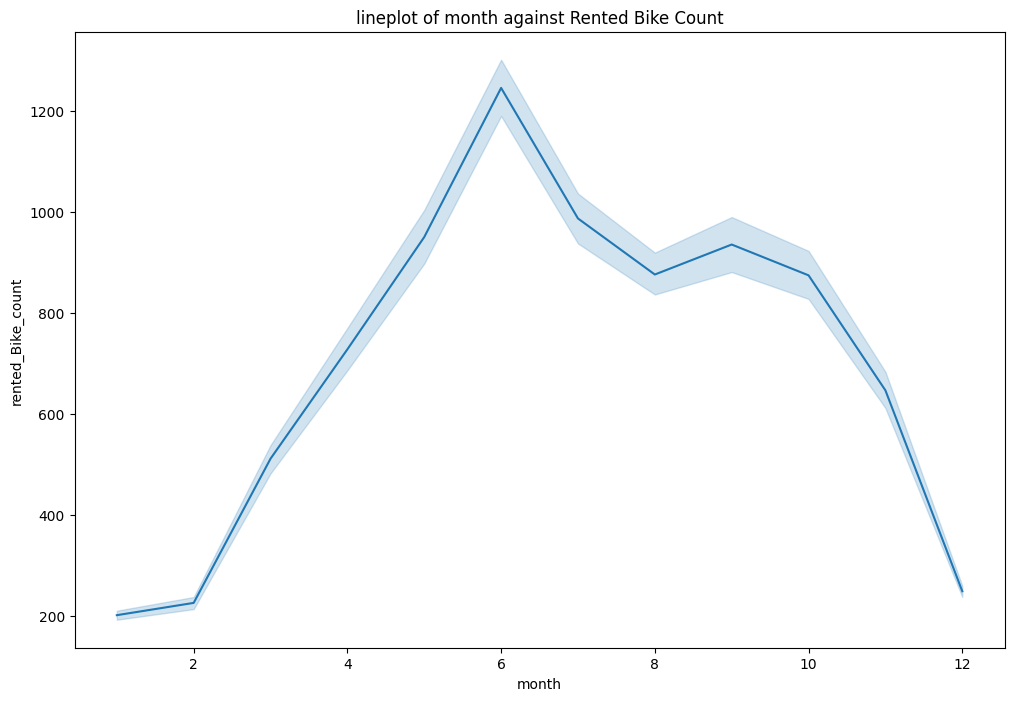

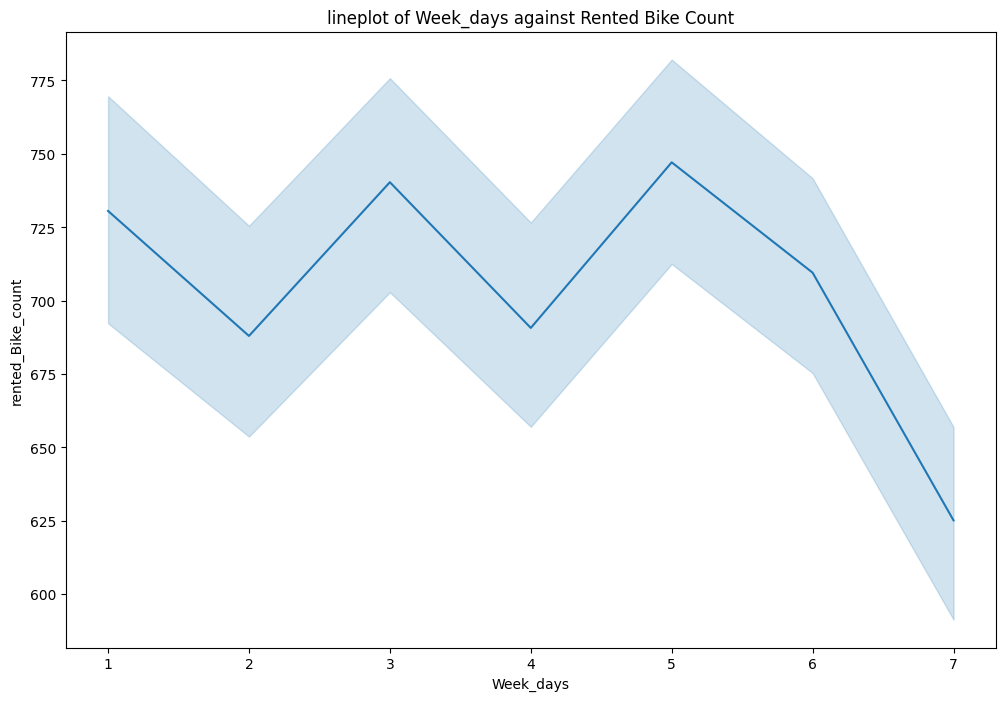

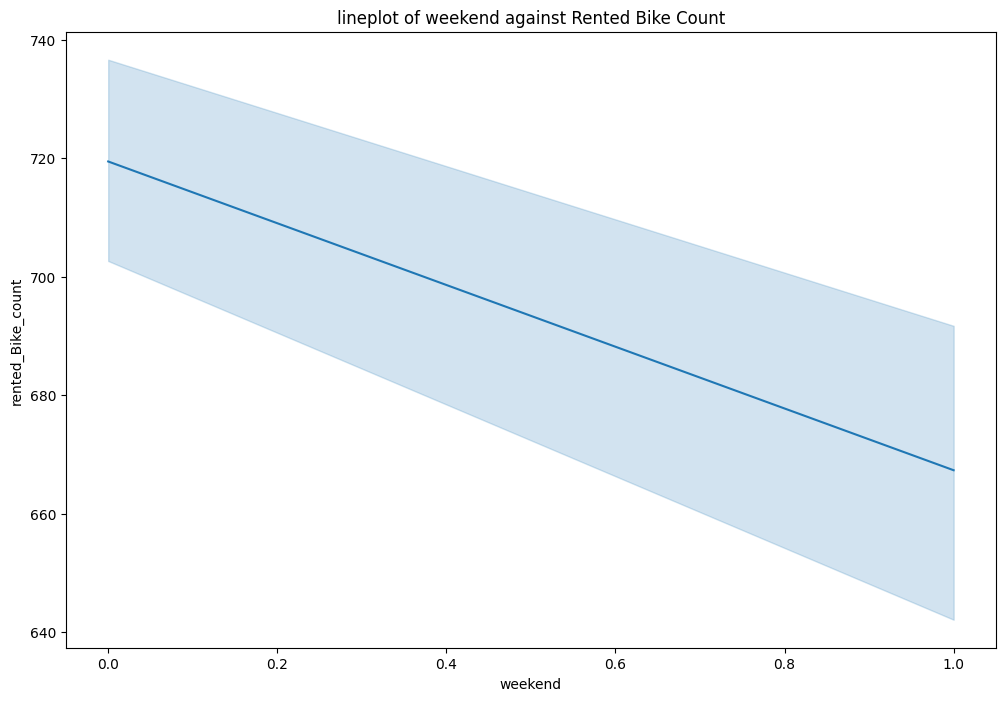

In [ ]:
# Chart - 8 visualization code
target_variables = [var for var in df1.columns if var not in ['rented_Bike_count', 'Seasons', 'Holiday', 'Functioning_Day', 'year']]
for var in target_variables:
    plt.figure(figsize=(12,8))
    ax=sns.lineplot(x=df1[var], y=df1["rented_Bike_count"],data=df1)
    ax.set_title(f'lineplot of {var} against Rented Bike Count')
    plt.show()

##### 1. Why did you pick the specific chart?

Line plots are excellent for visualizing trends within a dataset. They allow easy identification of increasing, decreasing, or cyclical patterns over time or across a series of data points.

##### 2. What is/are the insight(s) found from the chart?

1 - When humidity crosses 80, there is a sharp decline in rented bike counts.

2 - The number of bikes rented is higher during rush hours.

3 - There is a sharp decline if the temperature goes below -1.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, absolutely, these insights will be invaluable while implementing the models. Given that humidity's crossing 80 leads to a decline in demand and there's a higher bike rental rate during rush hours, prioritizing these factors while building models seems crucial.

#### Chart - 9

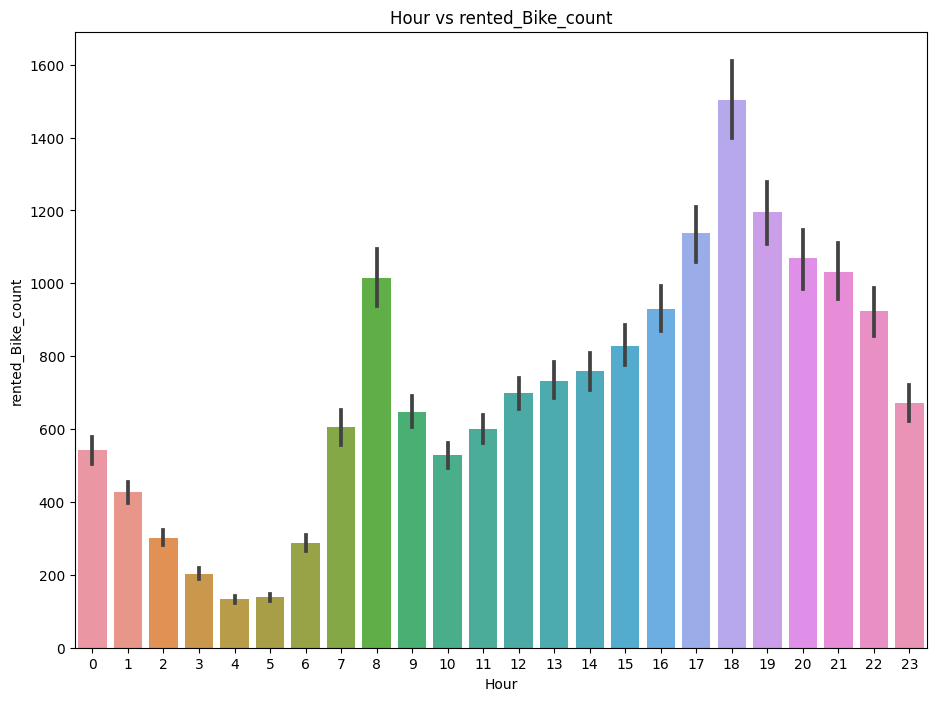

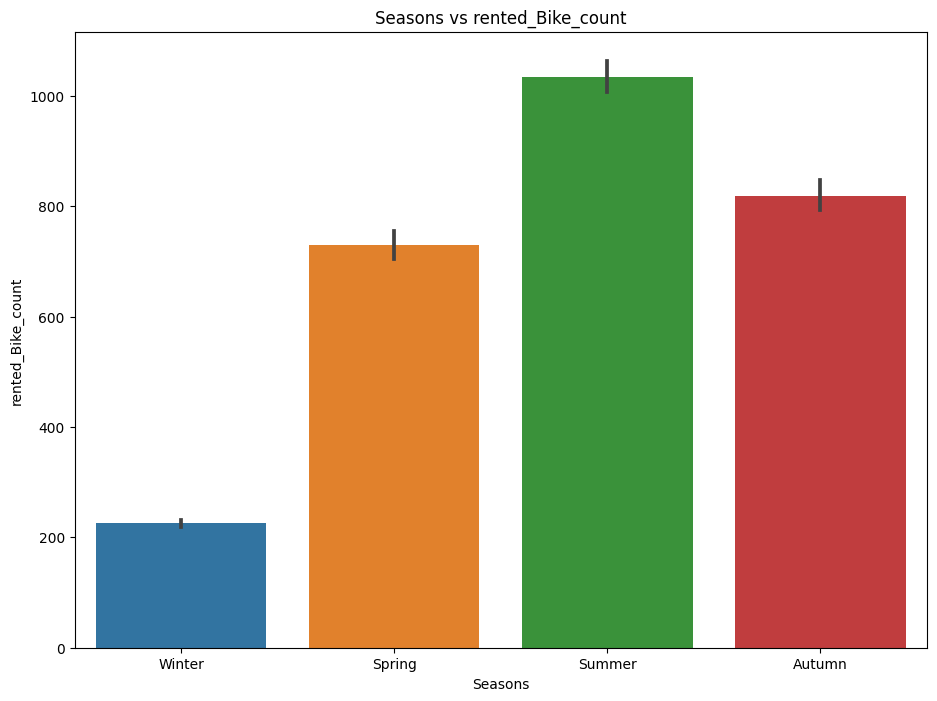

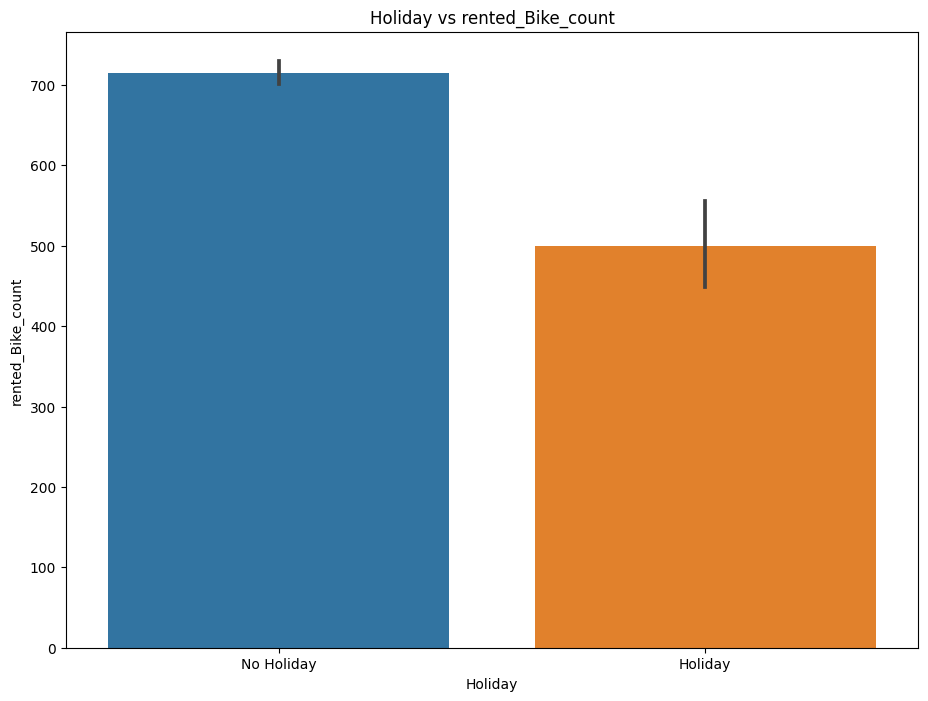

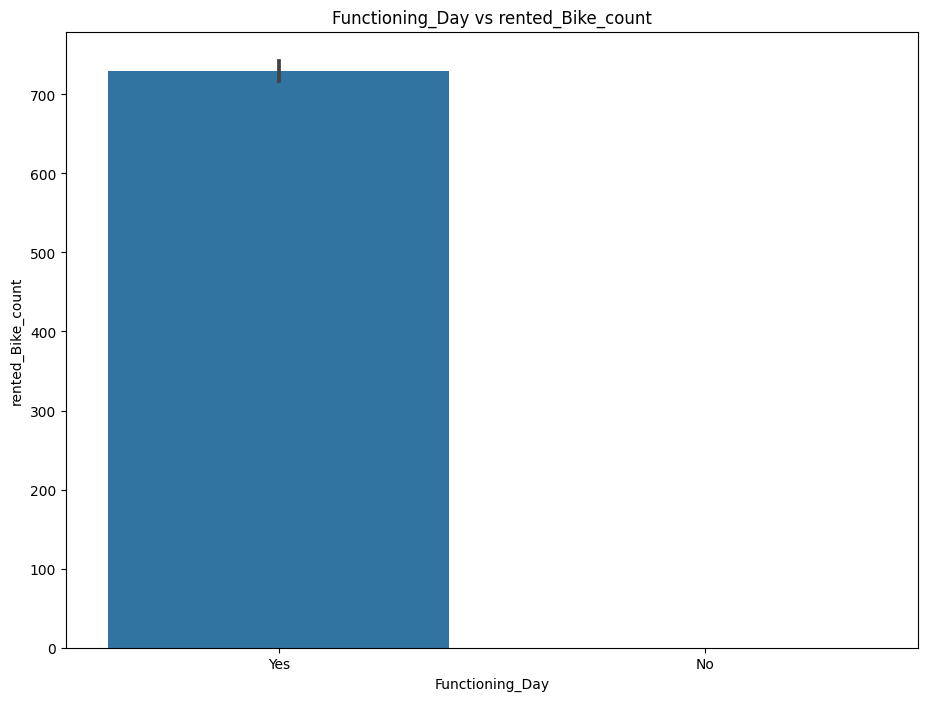

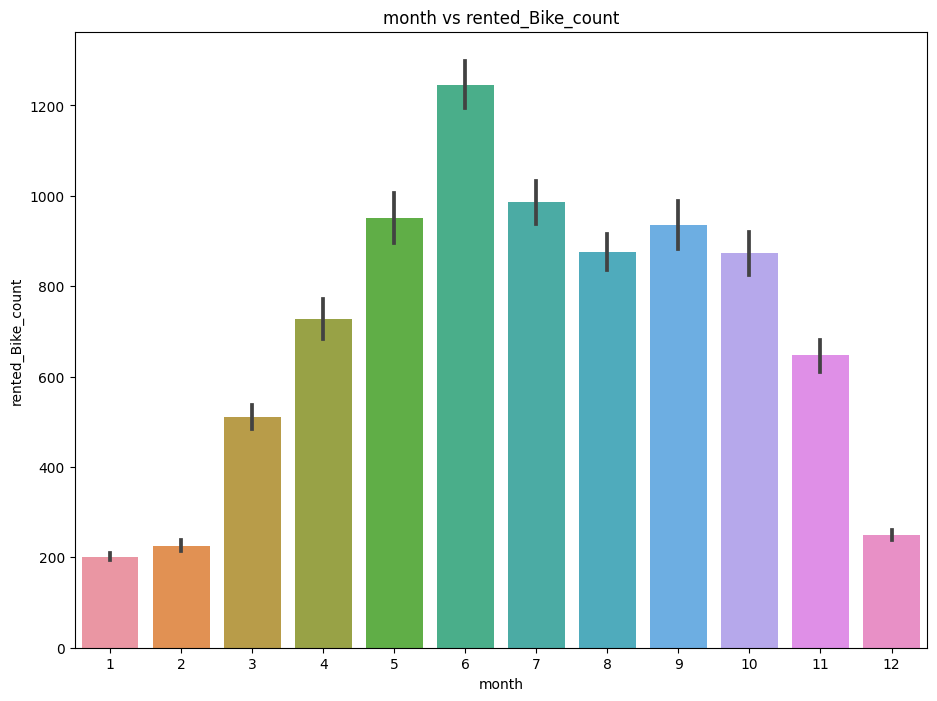

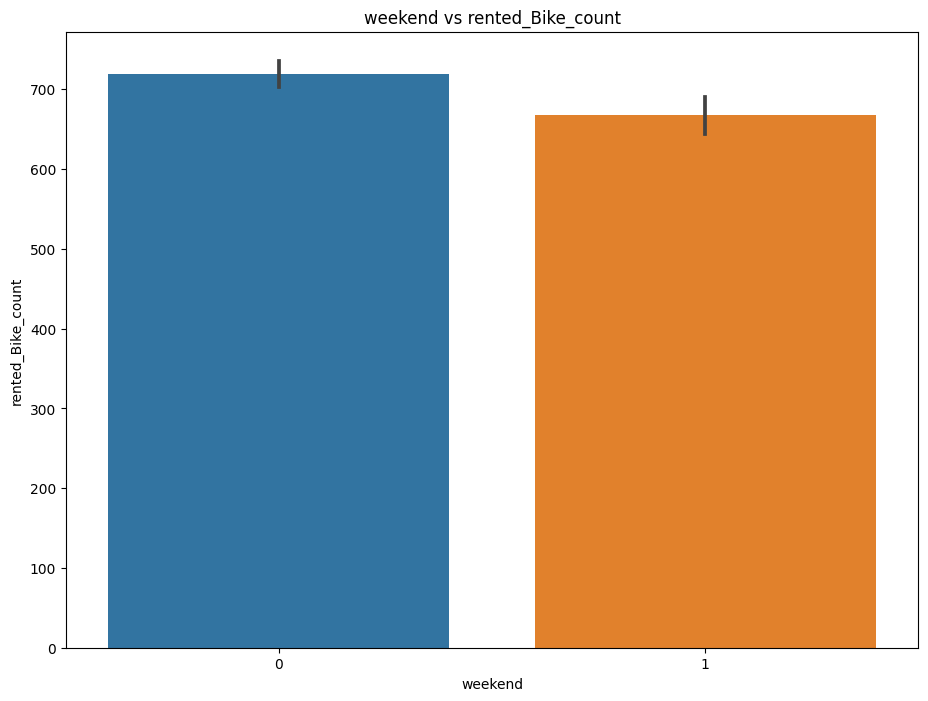

In [ ]:
# Chart - 9 visualization code
for i in Categorical_var:
  plt.figure(figsize=(11,8))
  sns.barplot(x=i,y=dependent_variable[0],data=df1)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

In this dataset, there are some columns (Hours, seasons, holiday, functioning_Day, month, weekend) that are crucial, requiring in-depth analysis before implementing any models. To accomplish this, I used a barplot to analyze these features.

##### 2. What is/are the insight(s) found from the chart?

1 - In hour vs rented bike column - Thhere are very high demand In the morning 7am
to 9am and in the evening 5pm to 8pm.

2 - The rented bike counts is higher during the summer and lowest during the winter.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, definitely, it can assist us in building the models.we can work on according to demand.

#### Chart - 10

In [ ]:
Continous_Variable = ['Temperature', 'Humidity', 'Wind_speed', 'Visibility', 'Dew_point_temperature','Solar_Radiation', 'Rainfall', 'Snowfall']

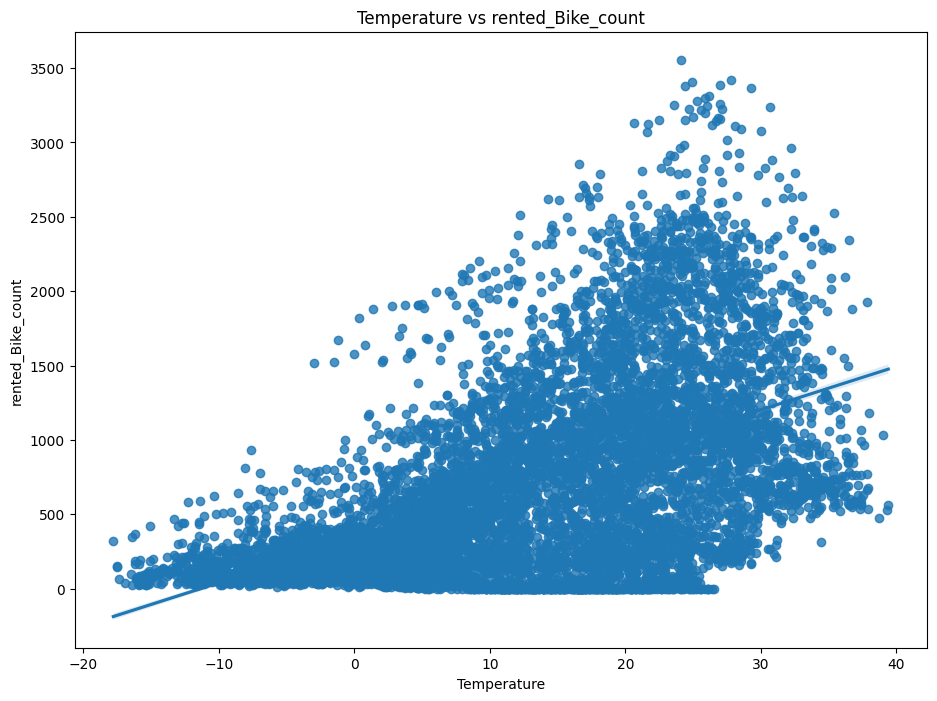

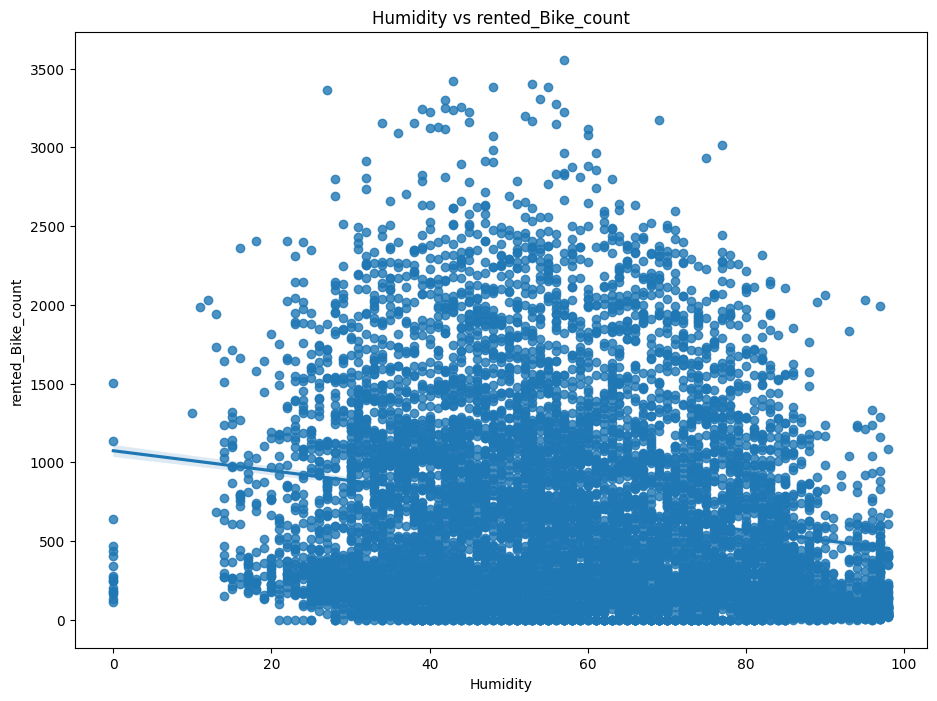

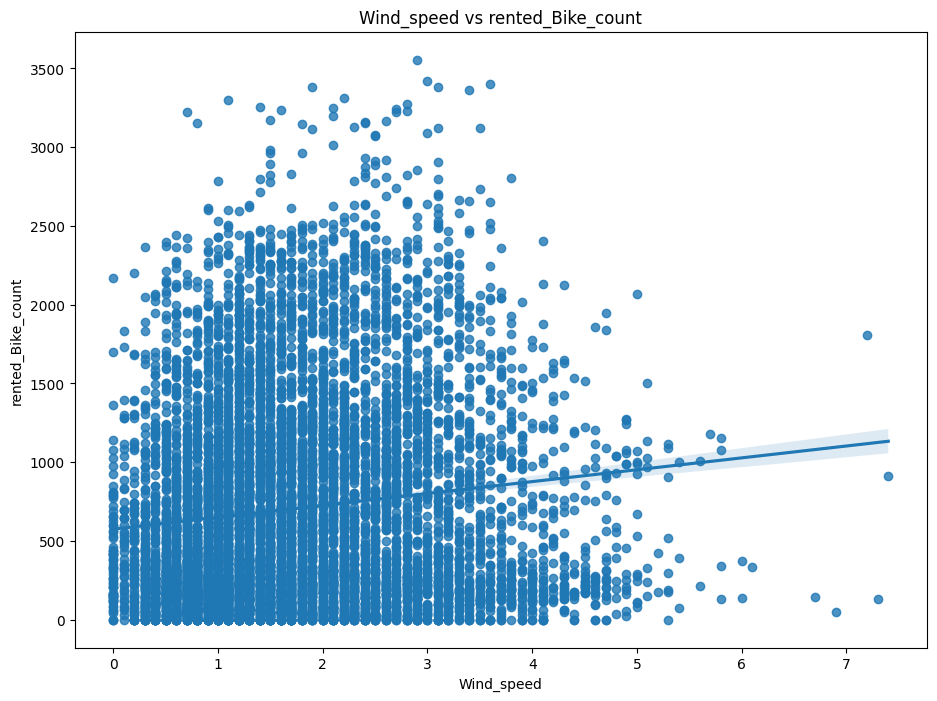

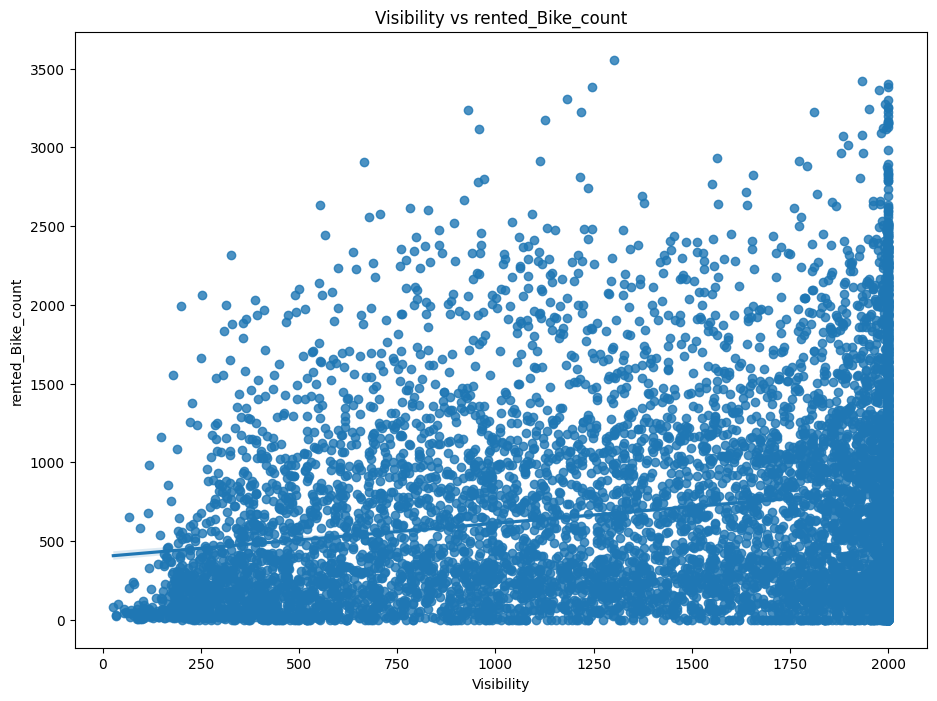

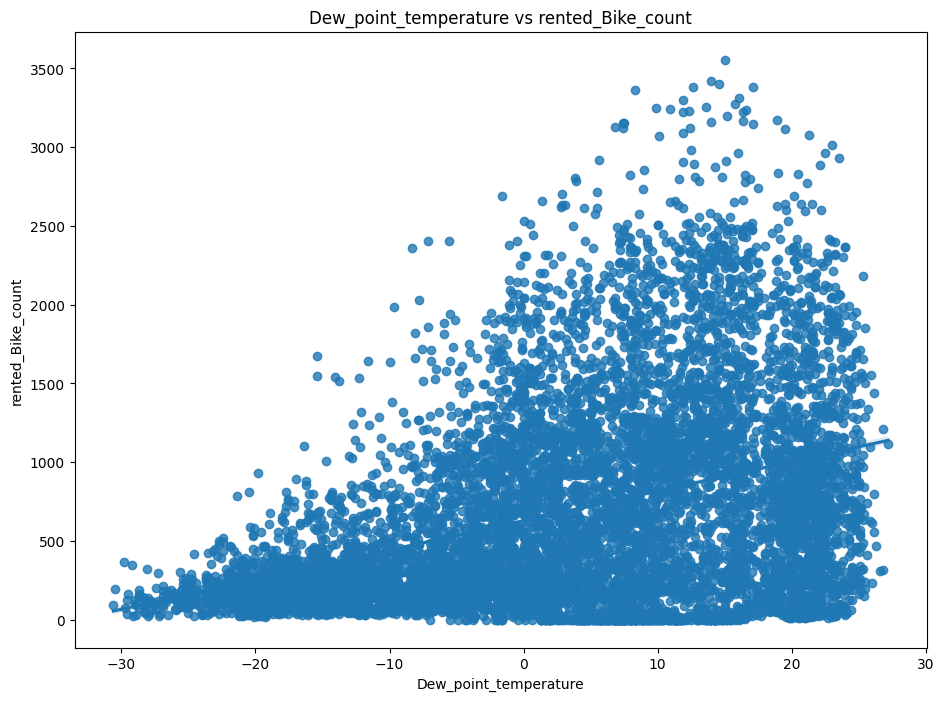

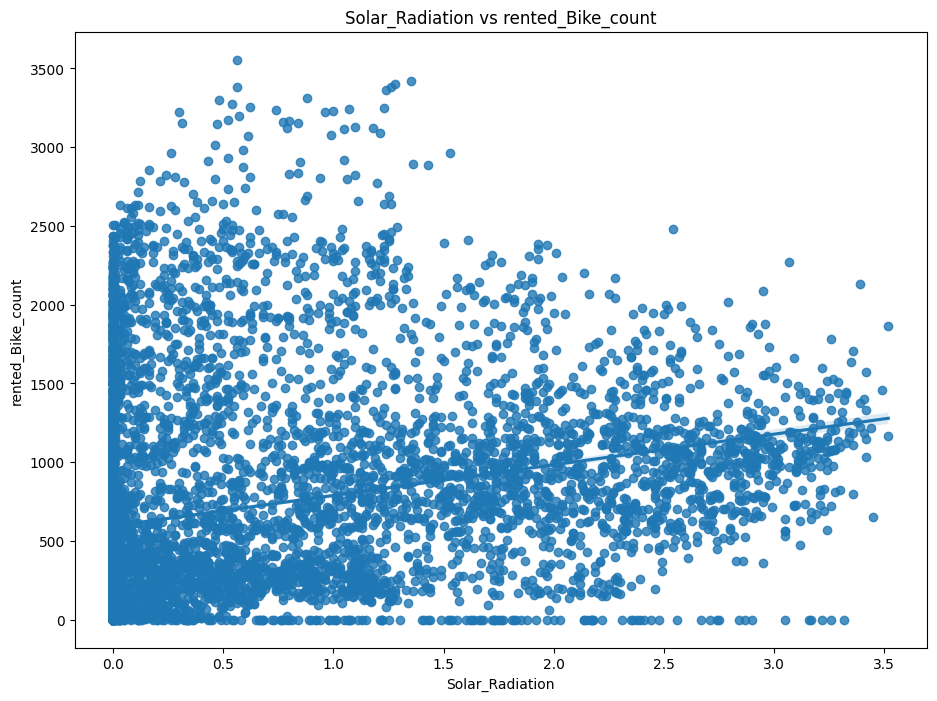

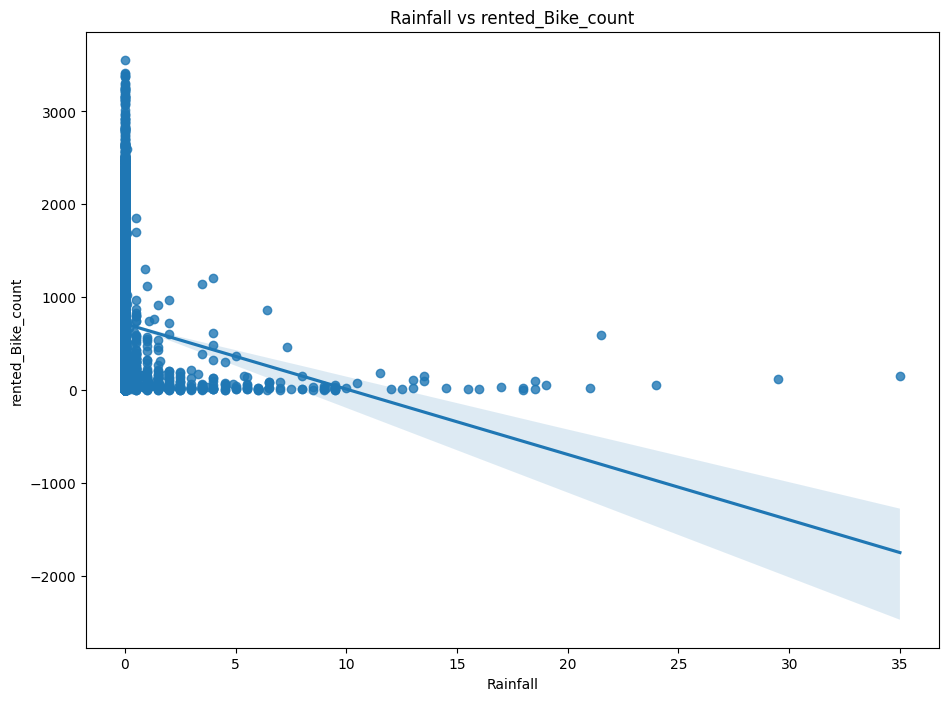

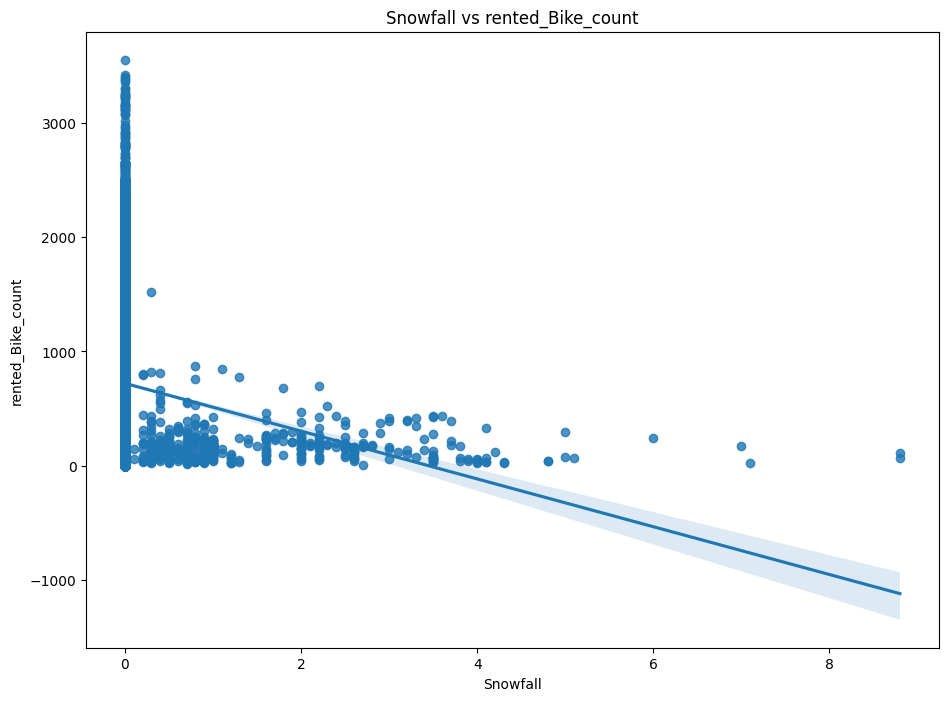

In [ ]:
# Chart - 10 visualization code
for i in Continous_Variable:
  plt.figure(figsize=(11,8))
  sns.regplot(x=i,y = dependent_variable[0],data=df1)
  plt.xlabel(i)
  plt.ylabel(dependent_variable[0])
  plt.title(i+' vs '+ dependent_variable[0])
  plt.show()

##### 1. Why did you pick the specific chart?

I used The Regplot to visualize the relationship between two variables. A scatter plot can help us understand the pattern and relationship between two variables.

##### 2. What is/are the insight(s) found from the chart?

 we can see that there is some linearity between temperature, solar radiation & dew point temperature with dependent variable(rented_bike_counts)

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There are a few variables showing patterns with the dependent variable. These variables might be important features when predicting rented bike counts, so the business needs to focus on them.

#### Chart - 11

[Text(0.5, 1.0, 'Count of Rented bikes acording to Seasons ')]

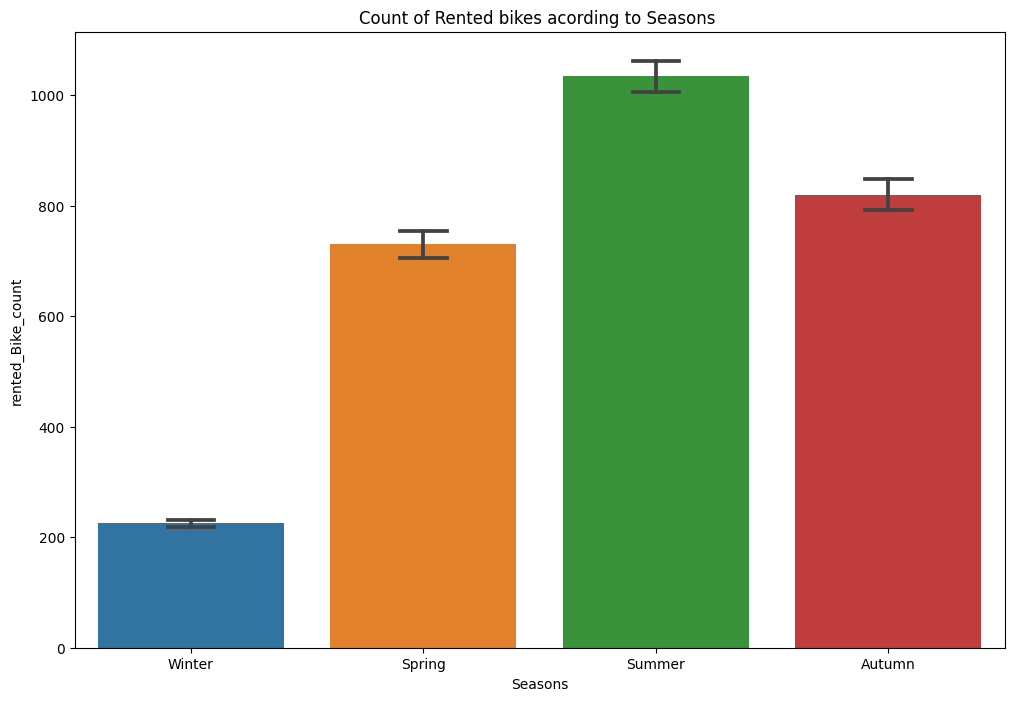

In [ ]:
# Chart - 11 visualization code
fig,ax = plt.subplots(figsize=(12,8))
sns.barplot(data = df1,x='Seasons',y='rented_Bike_count',ax = ax,capsize=.2)
ax.set(title='Count of Rented bikes acording to Seasons ')

##### 1. Why did you pick the specific chart?

I wanted to assess the dependency of the column 'bike_rented_counts' on seasons

##### 2. What is/are the insight(s) found from the chart?

Yes, we can clearly see that the column 'rented_bike_counts' exhibits high dependency on the columns representing spring, summer, and autumn, but there is less dependency in the winter season.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, it can have a positive impact on the business. We can observe that bikes were used most often during the spring, summer, and autumn seasons.

#### Chart - 12

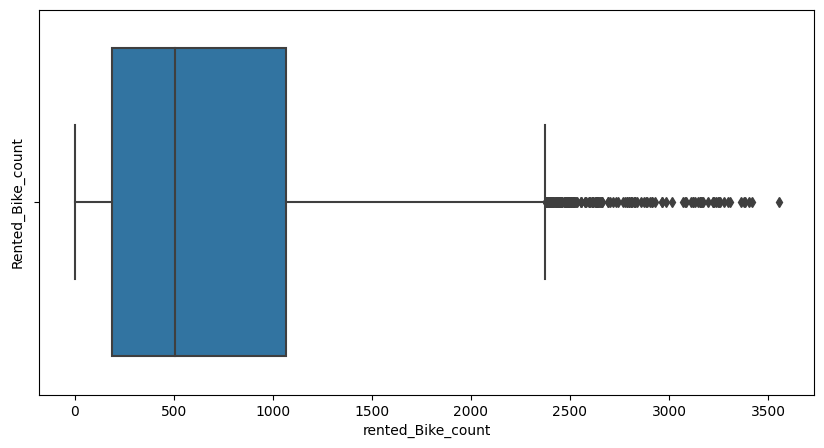

In [ ]:
# Chart - 12 visualization code
plt.figure(figsize=(10,5))
sns.boxplot(x = df1['rented_Bike_count'])
plt.ylabel('Rented_Bike_count')
plt.show()

##### 1. Why did you pick the specific chart?

I used a boxplot to check for outliers in the independent variable (rented_bike_counts)

##### 2. What is/are the insight(s) found from the chart?

Some outliers are there in the dependent variable(rented_bike_counts).


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes,beacuse outliers can significantly impact a model's performance, influencing its accuracy, bias, variance, adherence to model assumptions, and the overall robustness of the model.

#### Chart - 13

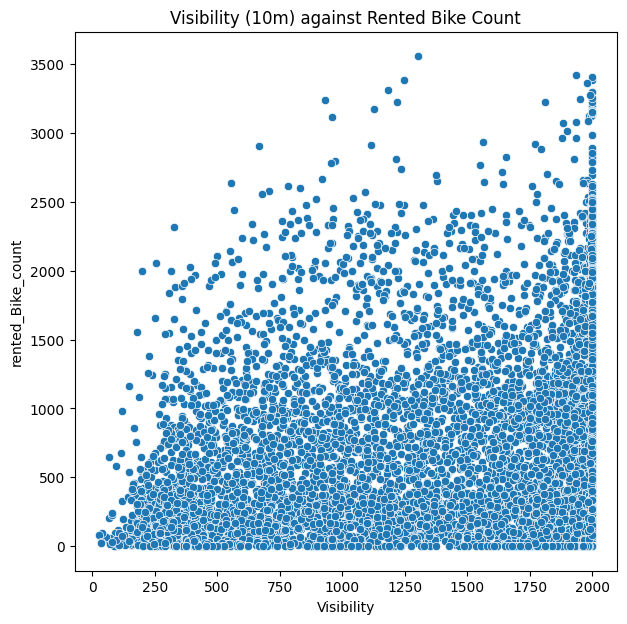

In [ ]:
# Chart - 13 visualization code
plt.figure(figsize=(7,7))
ax = sns.scatterplot(x = "Visibility", y="rented_Bike_count",data=df1)
ax.set_title('Visibility (10m) against Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

I used a scatter to check the relationship between two variables.

##### 2. What is/are the insight(s) found from the chart?

After 700, there is a decline in the visibility.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, low visibility can impact business for rented bikes.

#### Chart - 14 - Correlation Heatmap

In [ ]:
corr = df1.corr()

<Axes: >

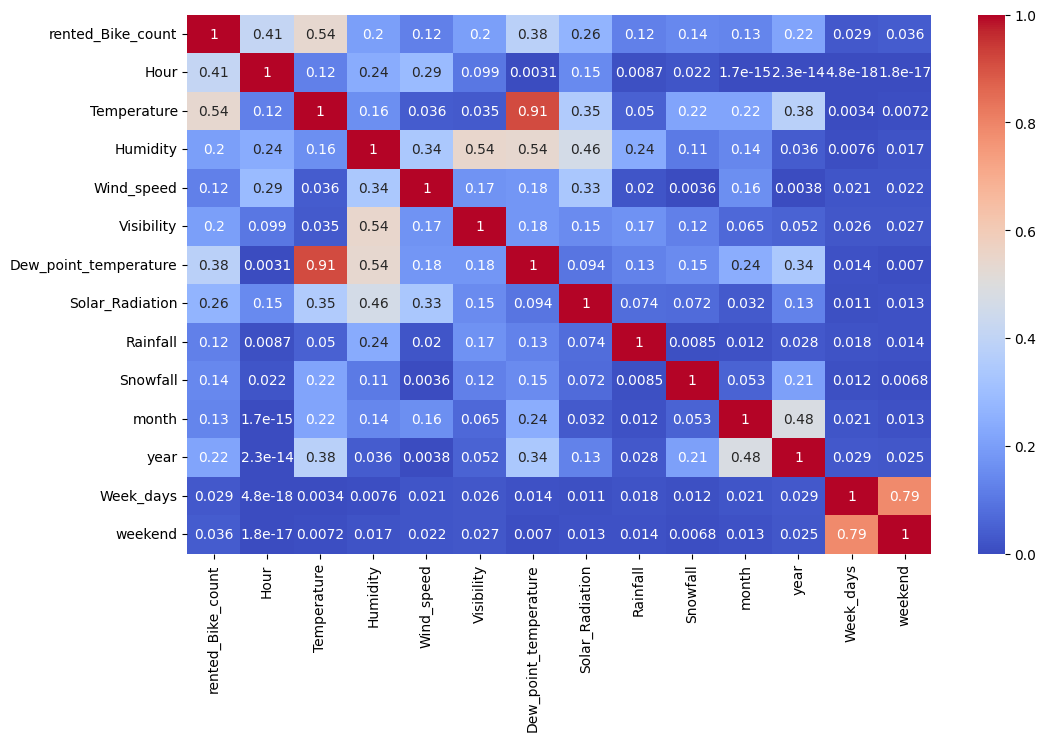

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(12,7))
sns.heatmap(abs(corr), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

Heatmaps are graphical representations of data where values are depicted using color gradients.Heatmaps can display relationships between two sets of data by using color intensity to represent the strength or magnitude of that relationship.They are useful for comparing multiple variables or categories simultaneously.

##### 2. What is/are the insight(s) found from the chart?

Some columns, such as temperature, dew point temperature, humidity, and weekend, are highly correlated with each other.

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df1,diag_kind='kde')

Output hidden; open in https://colab.research.google.com to view.

##### 1. Why did you pick the specific chart?

A pairplot, also known as a scatterplot matrix, is a visualization that enables the exploration of relationships between all pairs of variables in a dataset. It is a valuable tool for data analysis as it facilitates a quick understanding of how variables in a dataset relate to each other.

Therefore, we utilized a pair plot to analyze the data patterns and relationships between features. It functions similarly to a correlation map, but it provides a graphical representation, allowing for a visual understanding of these relationships.

##### 2. What is/are the insight(s) found from the chart?

Based on the above pair plot, we observed that there isn't a clear linear relationship between most variables, except for dew point temperature, temperature, and solar radiation, which do exhibit a relationship.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no difference in the mean number of rented bikes between different hours of the day.

Alternative hypothesis: There is a difference in the mean number of rented bikes between different hours of the day.

Test type : ANOVA test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis_H0 = "There is no difference in the mean number of rented bikes between different hours of the day."
alternative_hypothesis_Ha = "There is a difference in the mean number of rented bikes between different hours of the day."
# Group the data by hour
data_by_hour = df1.groupby('Hour')

# Calculate the mean number of rented bikes for each hour
means = df1['rented_Bike_count'].mean()

# Perform an ANOVA test to compare the means
F, p = stats.f_oneway(*[data_by_hour['rented_Bike_count'].get_group(hour)
                        for hour in data_by_hour.groups])
# * operator before the list of groups passed to the f_oneway() function,
# which specifies that the list should be treated as separate arguments rather than as a single argument

# Print the result of the test
print(f"F-statistic: {F:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05: #0.05 is significance threshold value to test
   print(f"{alternative_hypothesis_Ha} (reject H0(Null Hypothesis))")
else:
   print(f"{null_hypothesis_H0} (fail to reject H0(Null Hypothesis))")

F-statistic: 156.687
p-value: 0.000
There is a difference in the mean number of rented bikes between different hours of the day. (reject H0(Null Hypothesis))


##### Which statistical test have you done to obtain P-Value?

I chose to use an analysis of variance (ANOVA) test for the hypotheses because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups.

##### Why did you choose the specific statistical test?

ANOVA works by comparing the variance within each group to the variance between the groups. If the variance within the groups is small relative to the variance between the groups, it suggests that the means of the groups are significantly different. On the other hand, if the variance within the groups is large relative to the variance between the groups, it suggests that the means of the groups are not significantly different.

This test is suitable for these hypotheses because they both involve comparing the mean values of a variable (the number of rented bikes) with different group (hours of the day).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no relationship between temperature and the number of rented bikes.
Alternative hypothesis: There is a relationship between temperature and the number of rented bikes.
Test Type: Pearson correlation coefficient

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis = "There is no relationship between temperature and the number of rented bikes."
alternative_hypothesis = "There is a relationship between temperature and the number of rented bikes."

# Calculate the correlation between temperature and the number of rented bikes
r, p = stats.pearsonr(df1['Temperature'], df1['rented_Bike_count'])

# Print the result of the test
print(f"Correlation coefficient: {r:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05:
   print(f"{alternative_hypothesis} (reject H0)")
else:
   print(f"{null_hypothesis} (fail to reject H0)")

Correlation coefficient: 0.539
p-value: 0.000
There is a relationship between temperature and the number of rented bikes. (reject H0)


##### Which statistical test have you done to obtain P-Value?

I used the Pearson correlation coefficient and the p-value to test the statistical significance of the relationship between the number of rented bikes and the temperature. Specifically, I used the pearsonr() function from the scipy.stats library to calculate the Pearson correlation coefficient and the p-value between the Temperature and Rented_Bike_Count columns of the data.

##### Why did you choose the specific statistical test?

The Pearson correlation coefficient is a measure of the strength and direction of the linear relationship between two variables, and it takes on values between -1 and 1. A value of -1 indicates a strong negative linear relationship, a value of 0 indicates no linear relationship, and a value of 1 indicates a strong positive linear relationship.

I chose to use the Pearson correlation coefficient and p-value for this null hypothesis because they are suitable for testing the statistical significance of a linear relationship between two continuous variables. In this case, the Temperature column is a continuous variable that can take on any value within a certain range, and the Rented_Bike_Count column is also a continuous variable that can take on any integer value within a certain range.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: There is no difference in the mean number of rented bikes between different seasons.
Alternative hypothesis: There is a difference in the mean number of rented bikes between different seasons.
Test Type: ANOVA Test

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Define the null and alternative hypotheses
null_hypothesis = "There is no difference in the mean number of rented bikes between different seasons."
alternative_hypothesis = "There is a difference in the mean number of rented bikes between different seasons."

# Group the data by season
data_by_season = df1.groupby('Seasons')

# Calculate the mean number of rented bikes for each season
means = data_by_season['rented_Bike_count'].mean()

# Perform an ANOVA test to compare the means
F, p = stats.f_oneway(*[data_by_season['rented_Bike_count'].get_group(season)
                         for season in data_by_season.groups])
# Print the result of the test
print(f"F-statistic: {F:.3f}")
print(f"p-value: {p:.3f}")
if p < 0.05:
   print(f"{alternative_hypothesis} (reject H0)")
else:
   print(f"{null_hypothesis} (fail to reject H0)")

F-statistic: 776.468
p-value: 0.000
There is a difference in the mean number of rented bikes between different seasons. (reject H0)


##### Which statistical test have you done to obtain P-Value?

I chose to use an analysis of variance (ANOVA) test for the hypotheses because ANOVA is a statistical test that is used to determine whether there is a statistically significant difference in the means of two or more groups.

##### Why did you choose the specific statistical test?

This test is suitable for these hypotheses because they both involve comparing the mean values of a variable (the number of rented bikes) with different group (seasons).

ANOVA works by comparing the variance within each group to the variance between the groups. If the variance within the groups is small relative to the variance between the groups, it suggests that the means of the groups are significantly different. On the other hand, if the variance within the groups is large relative to the variance between the groups, it suggests that the means of the groups are not significantly different.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

rented_Bike_count        0
Hour                     0
Temperature              0
Humidity                 0
Wind_speed               0
Visibility               0
Dew_point_temperature    0
Solar_Radiation          0
Rainfall                 0
Snowfall                 0
Seasons                  0
Holiday                  0
Functioning_Day          0
month                    0
year                     0
Week_days                0
weekend                  0
dtype: int64


<Axes: >

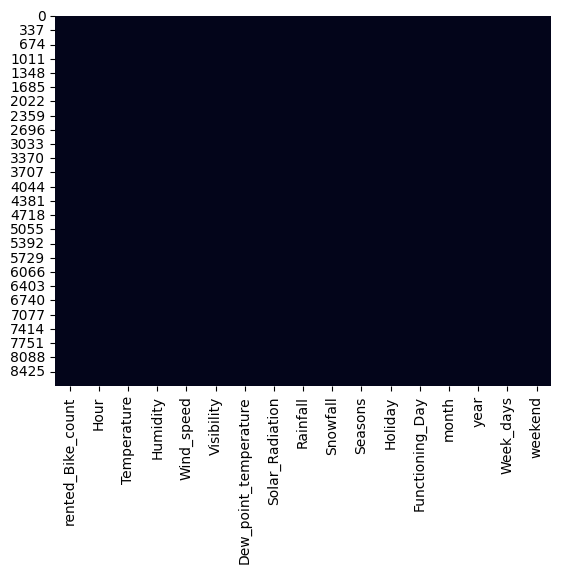

In [ ]:
# Handling Missing Values & Missing Value Imputation
print(df1.isnull().sum())
sns.heatmap(df1.isnull(), cbar=False)

#### What all missing value imputation techniques have you used and why did you use those techniques?

I have used isnull().sum() to identify null values in the data because this technique shows us if there are any null values present in your dataset or not.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments
column_to_check = ['Wind_speed','Solar_Radiation','Rainfall','Snowfall']

In [ ]:
percentile25 = df1[column_to_check].quantile(0.25)
percentile75 = df1[column_to_check].quantile(0.75)

In [ ]:
iqr = percentile75 - percentile25

In [ ]:
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [ ]:
df1[column_to_check] = np.where(
    df1[column_to_check] > upper_limit,
    upper_limit,
    np.where(
        df1[column_to_check] < lower_limit,
        lower_limit,
        df1[column_to_check]

    )
)

##### What all outlier treatment techniques have you used and why did you use those techniques?

Here i use the IQR method and Capping method, where I capped outliers up to the 75th percentile. Beyond that, outliers were converted to the upper limit value.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
df1['Snowfall'] = df1['Snowfall'].apply(lambda x: 1 if x>0 else 0)
df1['Rainfall'] = df1['Rainfall'].apply(lambda x: 1 if x>0 else 0)

In [ ]:
df1['Visibility'] = df1['Visibility'].apply(lambda x: 0 if 0<=x<=399 else (1 if 400<=x<=999 else 2))

In [ ]:
df1['Functioning_Day'] = np.where(df1['Functioning_Day'] == 'Yes',1,0)
df1['Holiday'] = np.where(df1['Holiday'] == 'Holiday', 1,0)

In [ ]:
df1 = pd.get_dummies(df1, columns = ['Hour', 'Visibility', 'month', 'weekend'])

In [ ]:
df1.columns

Index(['rented_Bike_count', 'Temperature', 'Humidity', 'Wind_speed',
       'Dew_point_temperature', 'Solar_Radiation', 'Rainfall', 'Snowfall',
       'Seasons', 'Holiday', 'Functioning_Day', 'year', 'Week_days', 'Hour_0',
       'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7',
       'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Visibility_0',
       'Visibility_1', 'Visibility_2', 'month_1', 'month_2', 'month_3',
       'month_4', 'month_5', 'month_6', 'month_7', 'month_8', 'month_9',
       'month_10', 'month_11', 'month_12', 'weekend_0', 'weekend_1'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

I have used one hot encoding for the visibility,hour,month and weekend columns.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
New_val = ['Temperature', 'Humidity', 'Wind_speed', 'Dew_point_temperature', 'Solar_Radiation']

In [ ]:
New_val_feature_df = pd.DataFrame(df1[New_val])

In [ ]:
calc_vif(df1[[i for i in New_val_feature_df]])

variables        VIF
0            Temperature  14.500972
1               Humidity   3.761393
2             Wind_speed   4.672309
3  Dew_point_temperature   7.380435
4        Solar_Radiation   2.709923

In [ ]:
df1.drop(['Dew_point_temperature','Temperature','Seasons'],axis=1, inplace=True)

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Here, I have used the variance inflation factor to check for variance inflation among variables.

##### Which all features you found important and why?

It seems that the columns 'Temperature' and 'Dew_point_temperature' exhibit a high variance factor

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes,because the independent variables and dependent variables have skeweness. here I have used a np.sqrt.

In [ ]:
# Transform Your data
np.sqrt(df1[dependent_variable]).skew()

rented_Bike_count    0.237362
dtype: float64

In [ ]:
X = df1.drop('rented_Bike_count',axis=1)
y = np.sqrt(df1[dependent_variable])

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)

##### Which method have you used to scale you data and why?

Here i have StandardScaler. StandardScaler is used for transforming features by centering them around zero and scaling them to unit variance

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

##### What data splitting ratio have you used and why?

I have used 80 percent of the data for training the model and 20 % for testing the model.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

The data is not imbalanced.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

The data is not imbalanced.therefore we don't need to use any technique here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation
lr = LinearRegression()

# Fit the Algorithm
lr.fit(X_train,y_train)

# Predict on the model
lr.score(X_train, y_train)*100

73.44163752513506

In [ ]:
lr.coef_

array([[-2.94694586e+00, -3.94207195e-01,  2.45587306e+00,
        -4.86706098e+12, -6.45024413e+12, -6.89205426e-01,
         4.98140716e+00, -5.08480334e+13,  1.26580404e-01,
        -1.34199771e+13, -1.34199771e+13, -1.34199771e+13,
        -1.34199771e+13, -1.34199771e+13, -1.34199771e+13,
        -1.34199771e+13, -1.34199771e+13, -1.34199771e+13,
        -1.34199771e+13, -1.34199771e+13, -1.34199771e+13,
        -1.34199771e+13, -1.34199771e+13, -1.34199771e+13,
        -1.34199771e+13, -1.34199771e+13, -1.34199771e+13,
        -1.34199771e+13, -1.34199771e+13, -1.34199771e+13,
        -1.34199771e+13, -1.34199771e+13, -1.34199771e+13,
        -2.40043278e+12, -3.31286043e+12, -3.79523016e+12,
         5.24832803e+13,  5.01026685e+13,  5.24832803e+13,
         5.17070692e+13,  5.24832803e+13,  5.17070692e+13,
         5.24832803e+13,  5.24832803e+13,  5.17070692e+13,
         5.24832803e+13,  5.17070692e+13,  1.63524686e+12,
         1.49053114e+13,  1.49053114e+13]])

In [ ]:
lr.intercept_

array([5.41940118])

In [ ]:
X_train_pred = lr.predict(X_train)
X_test_pred = lr.predict(X_test)

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
lr.score(X_test,y_test)*100

73.79639603879578

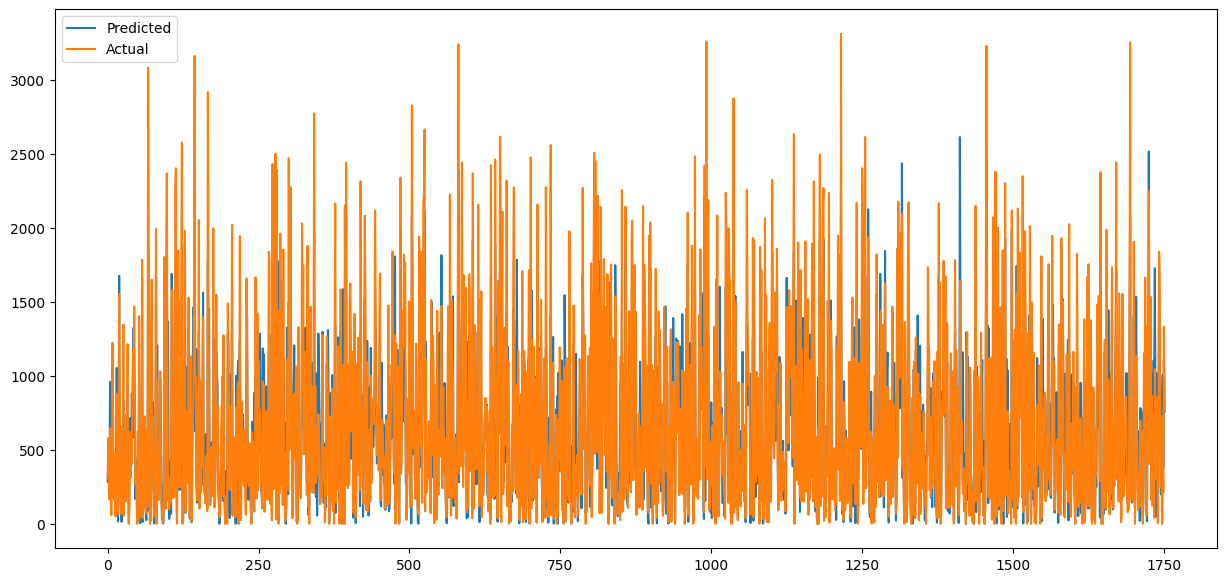

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(np.square(y_pred))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Training dataset metrics
train_MAE = mean_absolute_error(np.square(y_train),np.square(X_train_pred))
print(f"Mean Absolute Error : {train_MAE}")


train_MSE  = mean_squared_error(np.square(y_train), np.square(X_train_pred))
print("MSE :" , train_MSE)

train_RMSE = np.sqrt(train_MSE)
print("RMSE :" ,train_RMSE)

train_r2 = r2_score(np.square(y_train), np.square(X_train_pred))
print("R2 :" ,train_r2*100)

train_adjusted_r2 = 1-(1-r2_score(np.square(y_train), np.square(X_train_pred)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2*100)

Mean Absolute Error : 239.38567849544367
MSE : 115969.9294367617
RMSE : 340.5435793503699
R2 : 72.07179322185941
Adjusted R2: 71.87107303515437


In [ ]:
MAE = mean_absolute_error(np.square(y_test),np.square(X_test_pred))
print(f"Mean Absolute Error : {MAE}")

MSE  = mean_squared_error(np.square(y_test), np.square(X_test_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score(np.square(y_test), np.square(X_test_pred))
print("R2 :" ,r2*100)

adjusted_r2 = 1-(1-r2_score(np.square(y_test), np.square(X_test_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2*100)

Mean Absolute Error : 237.02004934138762
MSE : 113547.25457342406
RMSE : 336.96773521128705
R2 : 72.86950389159044
Adjusted R2: 72.07201723349492


In [ ]:
# Visualizing evaluation Metric Score chart
Scores = ['MAE','MSE','RMSE','r2','adjusted_r2']
train_lr = [train_MAE, train_MSE, train_RMSE, train_r2*100, train_adjusted_r2*100]
test_lr = [MAE,MSE,RMSE,r2*100,adjusted_r2*100]

#final dataframe of parameters
data_lr = pd.DataFrame({'Evalution Parameters': Scores, 'Train':train_lr, 'Test':test_lr}).set_index('Evalution Parameters')
data_lr

Train           Test
Evalution Parameters                              
MAE                      239.385678     237.020049
MSE                   115969.929437  113547.254573
RMSE                     340.543579     336.967735
r2                        72.071793      72.869504
adjusted_r2               71.871073      72.072017

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,75,80,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=10)
ridge_regressor.fit(X_train,y_train)

# Fit the Algorithm
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " neg_mean_squared_error: ", ridge_regressor.best_score_)

# Predict on the model
ridge_regressor.score(X_train,y_train)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  neg_mean_squared_error:  -41.52802617210537


-40.97455128596275

In [ ]:
X_train_ridge = ridge_regressor.predict(X_train)
y_test_ridge = ridge_regressor.predict(X_test)

In [ ]:
# Training dataset metrics
train_MAE_ridge = mean_absolute_error(np.square(y_train),np.square(X_train_ridge))
print(f"Mean Absolute Error : {train_MAE_ridge}")


train_MSE_ridge  = mean_squared_error(np.square(y_train), np.square(X_train_ridge))
print("MSE :" , train_MSE_ridge)

train_RMSE_ridge = np.sqrt(train_MSE_ridge)
print("RMSE :" ,train_RMSE_ridge)

train_r2_ridge = r2_score(np.square(y_train), np.square(X_train_ridge))
print("R2 :" ,train_r2_ridge*100)

train_adjusted_r2_ridge = 1-(1-r2_score(np.square(y_train), np.square(X_train_ridge)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_ridge*100)

Mean Absolute Error : 239.22281263871355
MSE : 115884.79243483728
RMSE : 340.4185547746146
R2 : 72.09229615572998
Adjusted R2: 71.8917233237315


In [ ]:
# Test dataset metrics
MAE_ridge = mean_absolute_error(np.square(y_test),np.square(y_test_ridge))
print(f"Mean Absolute Error : {MAE_ridge}")

MSE_ridge  = mean_squared_error(np.square(y_test), np.square(y_test_ridge))
print("MSE :" , MSE_ridge)

RMSE_ridge = np.sqrt(MSE_ridge)
print("RMSE :" ,RMSE_ridge)

r2_ridge = r2_score(np.square(y_test), np.square(y_test_ridge))
print("R2 :" ,r2_ridge*100)

adjusted_r2_ridge = 1-(1-r2_score(np.square(y_test), np.square(y_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_ridge*100)

Mean Absolute Error : 236.90508038082768
MSE : 113426.33594325712
RMSE : 336.78826574460265
R2 : 72.89839567270397
Adjusted R2: 72.10175827331256


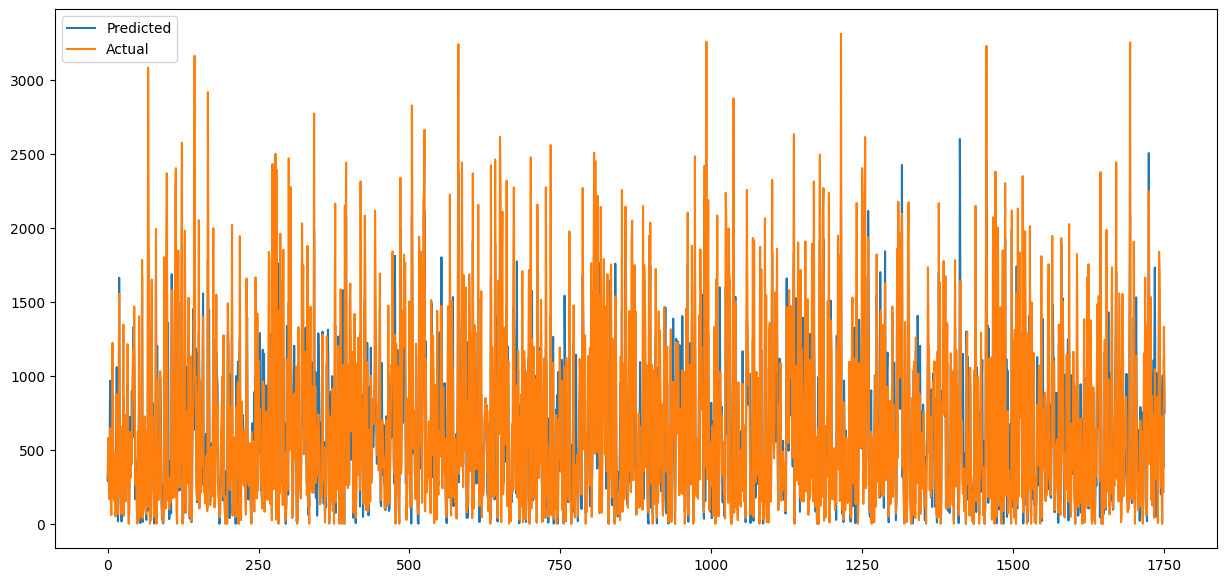

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(np.square(y_test_ridge))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
Scores = ['MAE','MSE','RMSE','r2','adjusted_r2']
train_ridge_cross = [train_MAE_ridge, train_MSE_ridge, train_RMSE_ridge, train_r2_ridge*100, train_adjusted_r2_ridge*100]
test_ridge_cross = [MAE_ridge,MSE_ridge,RMSE_ridge,r2_ridge*100,adjusted_r2_ridge*100]

#final dataframe of parameters
data_ridge_cross = pd.DataFrame({'Evalution Parameters': Scores, 'Train':train_ridge_cross, 'Test':test_ridge_cross}).set_index('Evalution Parameters')
data_ridge_cross

Train           Test
Evalution Parameters                              
MAE                      239.222813     236.905080
MSE                   115884.792435  113426.335943
RMSE                     340.418555     336.788266
r2                        72.092296      72.898396
adjusted_r2               71.891723      72.101758

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There is no noticeable difference after using GridSearchCV. The MAE, MSE, RMSE, R2, and adjusted R2 values are almost similar. There isn't a discernible improvement in the models; therefore, we need to explore other models

### ML Model - 2

In [ ]:
Random_fr = RandomForestRegressor()

In [ ]:
Random_fr.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
y_pred_train_random = Random_fr.predict(X_train)
y_pred_test_random = Random_fr.predict(X_test)

In [ ]:
# Training dataset metrics
train_MAE_random = mean_absolute_error(np.square(y_train),np.square(y_pred_train_random))
print(f"Mean Absolute Error : {train_MAE_random}")


train_MSE_random  = mean_squared_error(np.square(y_train),np.square(y_pred_train_random))
print("MSE :" , train_MSE_random)

train_RMSE_random = np.sqrt(train_MSE_random)
print("RMSE :" ,train_RMSE_random)

train_r2_random = r2_score(np.square(y_train), np.square(y_pred_train_random))
print("R2 :" ,train_r2_random*100)

train_adjusted_r2_random = 1-(1-r2_score(np.square(y_train), np.square(y_pred_train_random)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_random*100)

Mean Absolute Error : 46.611602909529196
MSE : 6041.573730037176
RMSE : 77.72756094228852
R2 : 98.54505110749534
Adjusted R2: 98.53459438123039


In [ ]:
# Test dataset metrics
MAE_Test_random = mean_absolute_error(np.square(y_test),np.square(y_pred_test_random))
print(f"Mean Absolute Error : {MAE_Test_random}")

MSE_test_random  = mean_squared_error(np.square(y_test), np.square(y_pred_test_random))
print("MSE :" , MSE_test_random)

RMSE_test_random = np.sqrt(MSE_test_random)
print("RMSE :" ,RMSE_test_random)

r2_test_random = r2_score(np.square(y_test), np.square(y_pred_test_random))
print("R2 :" ,r2_test_random*100)

adjusted_r2_test_random = 1-(1-r2_score(np.square(y_test), np.square(y_pred_test_random)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_test_random*100)

Mean Absolute Error : 127.63159862777391
MSE : 46395.06722019834
RMSE : 215.39514205338602
R2 : 88.91456076682988
Adjusted R2: 88.58871011329754


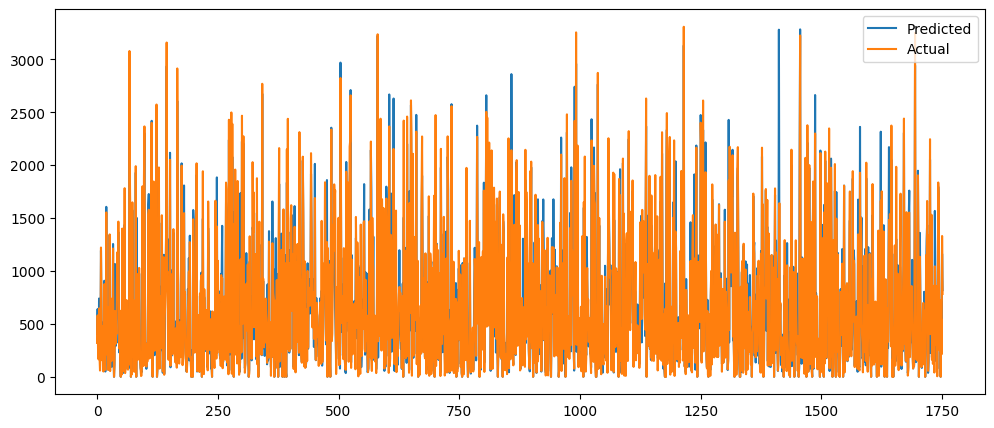

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(np.square(y_pred_test_random))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
Scores = ['MAE','MSE','RMSE','r2','adjusted_r2']
train_random = [train_MAE_random, train_MSE_random, train_RMSE_random, train_r2_random*100, train_adjusted_r2_random*100]
test_random = [MAE_Test_random, MSE_test_random,RMSE_test_random,r2_test_random*100,adjusted_r2_test_random*100]

#final dataframe of parameters
data_random = pd.DataFrame({'Evalution Parameters': Scores, 'Train':train_random, 'Test':test_random}).set_index('Evalution Parameters')
data_random

Train          Test
Evalution Parameters                           
MAE                     46.611603    127.631599
MSE                   6041.573730  46395.067220
RMSE                    77.727561    215.395142
r2                      98.545051     88.914561
adjusted_r2             98.534594     88.588710

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid_Random_fr = {
    'n_estimators': [50,80,100,200,300],
    'max_depth': [1,2,6,7,8,9,10,20,30,40],
    'min_samples_split':[10,20,30,40,50,100,150,200],
    'min_samples_leaf': [1,2,8,10,20,40,50]
}
random_search = RandomizedSearchCV(Random_fr, param_grid_Random_fr, verbose=2, cv=5, scoring='neg_mean_squared_error')

# Fit the Algorithm
random_search.fit(X_train, y_train)

# Predict on the model
best_model_rf_rs = random_search.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   1.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   1.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   1.7s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   2.2s
[CV] END max_depth=30, min_samples_leaf=2, min_samples_split=100, n_estimators=100; total time=   2.5s
[CV] END max_depth=1, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.5s
[CV] END max_depth=1, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.5s
[CV] END max_depth=1, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.5s
[CV] END max_depth=1, min_samples_leaf=10, min_samples_split=100, n_estimators=100; total time=   0.4s
[CV] END max

In [ ]:
best_model_rf_rs.feature_importances_

array([1.10458044e-01, 2.21769653e-03, 1.61087830e-01, 0.00000000e+00,
       0.00000000e+00, 1.00693314e-03, 1.42237616e-01, 3.53521476e-02,
       4.46637192e-03, 7.55719893e-03, 7.92292757e-03, 8.83993310e-03,
       1.12271475e-02, 1.32943505e-02, 1.31820384e-02, 8.86337045e-03,
       5.95558912e-03, 8.72897182e-03, 1.50679499e-04, 3.16010009e-03,
       7.34393480e-04, 1.83531133e-05, 1.41438504e-05, 5.23826672e-06,
       4.92600838e-04, 4.24545529e-03, 1.21423741e-02, 3.45075610e-02,
       2.33268523e-02, 2.02978139e-02, 3.19813789e-02, 2.81139986e-02,
       9.19512987e-03, 3.61614148e-05, 5.69539894e-04, 3.91042218e-04,
       9.04098008e-02, 8.80802816e-02, 3.41462194e-02, 2.83311770e-03,
       5.49464030e-04, 4.83756154e-03, 2.22749303e-03, 3.57363559e-03,
       5.32888274e-04, 5.06482949e-04, 4.96047212e-03, 4.85202466e-02,
       2.78374873e-03, 4.25760397e-03])

In [ ]:
Random_fr_best_para = random_search.best_params_

In [ ]:
Random_fr_best_para

{'n_estimators': 100,
 'min_samples_split': 100,
 'min_samples_leaf': 2,
 'max_depth': 30}

In [ ]:
y_pred_train_random_cross= best_model_rf_rs.predict(X_train)
y_pred_test_random_cross = best_model_rf_rs.predict(X_test)

In [ ]:
# Training dataset metrics
train_MAE_random_cross = mean_absolute_error(np.square(y_train),np.square(y_pred_train_random_cross))
print(f"Mean Absolute Error : {train_MAE_random_cross}")


train_MSE_random_cross  = mean_squared_error(np.square(y_train),np.square(y_pred_train_random_cross))
print("MSE :" , train_MSE_random_cross)

train_RMSE_random_cross = np.sqrt(train_MSE_random_cross)
print("RMSE :" ,train_RMSE_random_cross)

train_r2_random_cross = r2_score(np.square(y_train), np.square(y_pred_train_random_cross))
print("R2 :" ,train_r2_random_cross*100)

train_adjusted_r2_random_cross = 1-(1-r2_score(np.square(y_train), np.square(y_pred_train_random_cross)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_random_cross*100)

Mean Absolute Error : 167.2543617649886
MSE : 67855.37685338949
RMSE : 260.49064638368395
R2 : 83.65887601230713
Adjusted R2: 83.54143225790371


In [ ]:
# Test dataset metrics
MAE_test_random_cross = mean_absolute_error(np.square(y_test),np.square(y_pred_test_random_cross))
print(f"Mean Absolute Error : {MAE_test_random_cross}")

MSE_test_random_cross  = mean_squared_error(np.square(y_test), np.square(y_pred_test_random_cross))
print("MSE :" , MSE_test_random_cross)

RMSE_test_random_cross = np.sqrt(MSE_test_random_cross)
print("RMSE :" ,RMSE_test_random_cross)

r2_test_random_cross = r2_score(np.square(y_test), np.square(y_pred_test_random_cross))
print("R2 :" ,r2_test_random_cross*100)

adjusted_r2_test_random_cross = 1-(1-r2_score(np.square(y_test), np.square(y_pred_test_random_cross)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_test_random_cross*100)

Mean Absolute Error : 174.88842838439157
MSE : 76162.0411450617
RMSE : 275.974711060745
R2 : 81.80216713598772
Adjusted R2: 81.2672514139415


In [ ]:
Scores = ['MAE','MSE','RMSE','r2','adjusted_r2']
train_random_cross = [train_MAE_random_cross, train_MSE_random_cross, train_RMSE_random_cross, train_r2_random_cross*100, train_adjusted_r2_random_cross*100]
test_random_cross = [MAE_test_random_cross,MSE_test_random_cross,RMSE_test_random_cross,r2_test_random_cross*100,adjusted_r2_test_random_cross*100]

#final dataframe of parameters
data_random_cross = pd.DataFrame({'Evalution Parameters': Scores, 'Train':train_random_cross, 'Test':test_random_cross}).set_index('Evalution Parameters')
data_random_cross

Train          Test
Evalution Parameters                            
MAE                     167.254362    174.888428
MSE                   67855.376853  76162.041145
RMSE                    260.490646    275.974711
r2                       83.658876     81.802167
adjusted_r2              83.541432     81.267251

##### Which hyperparameter optimization technique have you used and why?

I have used RandomizedSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After using RandomizedSearchCV hyperparameter optimization tuning, the model has improved, overcoming the overfitting problem.

before and after applying RandomizedSearchCV hyperparameter :-

MAE :-
the Training MAE was (47.205101), and the Testing MAE was (128.488818). However, after applying hyperparameter tuning, both the Training MAE (116.039759) and Testing MAE (138.753842).

MSE:-

Before hyperparameter tuning, the Mean Squared Error (MSE) values were Training MSE (6227.207719) and Testing MSE (47344.004749). However, after applying hyperparameter tuning, the Training MSE is now (33948.357367), and the Testing MSE is (51413.656257).

RMSE:-

The Root Mean Squared Error (RMSE) values before hyperparameter tuning were Training RMSE (78.912659) and Testing RMSE (217.586775). After applying hyperparameter tuning, the Training RMSE is now (184.250800), and the Testing RMSE is (226.745797).

R2 scores:-

before hyperparameter tuning were Training R2 (98.500346) and Testing R2 (98.500346). After applying hyperparameter tuning, the Training R2 is now. (91.824460), and the Testing R2 is (87.715441).

Adjusted R2 scores:-

Before hyperparameter tuning, the Adjusted R2 scores were Training Adjusted R2 (98.489568) and Testing Adjusted R2 (98.489568	). However, after applying hyperparameter tuning, the Training Adjusted R2 is now (91.765703), and the Testing Adjusted R2 is (87.354342).

Overall RandomForestRegressor not working very well.we can see our modele performace has dropped after applying RandomizedSearchCV hyperparameter.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
XG_boost = XGBRegressor(objective= 'reg:squarederror')

# Fit the Algorithm
XG_boost.fit(X_train,y_train)

# Predict on the model
y_pred_train_XG_boost = XG_boost.predict(X_train)
y_pred_test_XG_boost = XG_boost.predict(X_test)

In [ ]:
# Training dataset metrics
train_MAE_XG = mean_absolute_error(np.square(y_train),np.square(y_pred_train_XG_boost))
print(f"Mean Absolute Error : {train_MAE_XG}")


train_MSE_XG  = mean_squared_error(np.square(y_train),np.square(y_pred_train_XG_boost))
print("MSE :" , train_MSE_XG)

train_RMSE_XG = np.sqrt(train_MSE_XG)
print("RMSE :" ,train_RMSE_XG)

train_r2_XG = r2_score(np.square(y_train), np.square(y_pred_train_XG_boost))
print("R2 :" ,train_r2_XG*100)

train_adjusted_r2_XG = 1-(1-r2_score(np.square(y_train), np.square(y_pred_train_XG_boost)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_XG*100)

Mean Absolute Error : 72.74209932830136
MSE : 13113.579234452009
RMSE : 114.5145372188702
R2 : 96.84195071739683
Adjusted R2: 96.81925379859129


In [ ]:
# Test dataset metrics
MAE_test_XG = mean_absolute_error(np.square(y_test),np.square(y_pred_test_XG_boost))
print(f"Mean Absolute Error : {MAE_test_XG}")

MSE_test_XG  = mean_squared_error(np.square(y_test), np.square(y_pred_test_XG_boost))
print("MSE :" , MSE_test_XG)

RMSE_test_XG = np.sqrt(MSE_test_XG)
print("RMSE :" ,RMSE_test_XG)

r2_test_XG = r2_score(np.square(y_test), np.square(y_pred_test_XG_boost))
print("R2 :" ,r2_test_XG*100)

adjusted_r2_test_XG = 1-(1-r2_score(np.square(y_test), np.square(y_pred_test_XG_boost)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_test_XG*100)

Mean Absolute Error : 127.72748330556256
MSE : 42398.807815985165
RMSE : 205.90970792069317
R2 : 89.86940992299411
Adjusted R2: 89.57162655800276


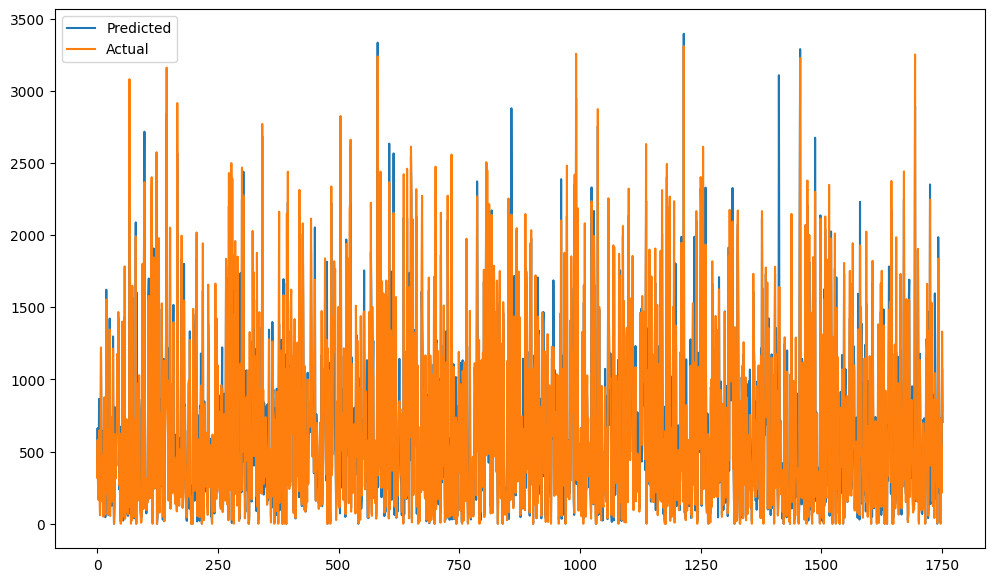

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(np.square(y_pred_test_XG_boost))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
EM = ['MAE','MSE','RMSE','r2','adjusted_r2']
train_XG = [train_MAE_XG, train_MSE_XG, train_RMSE_XG, train_r2_XG*100, train_adjusted_r2_XG*100]
test_XG = [MAE_test_XG,MSE_test_XG,RMSE_test_XG,r2_test_XG*100,adjusted_r2_test_XG*100]

#final dataframe of parameters
data_xg = pd.DataFrame({'Evalution Parameters': EM, 'Train':train_XG, 'Test':test_XG}).set_index('Evalution Parameters')
data_xg

Train          Test
Evalution Parameters                            
MAE                      72.742099    127.727483
MSE                   13113.579234  42398.807816
RMSE                    114.514537    205.909708
r2                       96.841951     89.869410
adjusted_r2              96.819254     89.571627

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
param_grid_xg = {
    'n_estimators': [50,80,100],
    'max_depth': [2,4,6],
    'colsample_bytree': [0.7, 0.8],
    'reg_alpha': [1.1, 1.2, 1.3],
    'reg_lambda': [1.1, 1.2, 1.3],
    'subsample': [0.7, 0.8, 0.9]

}
XGB = GridSearchCV(estimator= XG_boost, param_grid=param_grid_xg, cv=10, scoring='neg_mean_squared_error')

# Fit the Algorithm
XGB.fit(X_train, y_train)

# Predict on the model
best_model_xgb_gs = XGB.best_estimator_

In [ ]:
y_pred_train_XGB_cross = best_model_xgb_gs.predict(X_train)
y_pred_test_XGB_cross = best_model_xgb_gs.predict(X_test)

In [ ]:
best_model_xgb_gs.feature_importances_

array([0.00897298, 0.00145586, 0.01752816, 0.        , 0.        ,
       0.0034269 , 0.09754626, 0.03808597, 0.00369114, 0.00364021,
       0.00235038, 0.01442362, 0.02750143, 0.03515628, 0.03467692,
       0.02126547, 0.00908142, 0.01565336, 0.00205062, 0.01276728,
       0.00884809, 0.00124414, 0.00120026, 0.00161861, 0.00112108,
       0.00672477, 0.01840263, 0.04320376, 0.03662141, 0.03429716,
       0.04324093, 0.0330882 , 0.0079753 , 0.00136809, 0.00140595,
       0.00394302, 0.09237341, 0.09274937, 0.01563001, 0.00310515,
       0.00648042, 0.03596094, 0.00905929, 0.00340963, 0.01066722,
       0.00692493, 0.00195238, 0.11838353, 0.00426892, 0.00545716],
      dtype=float32)

In [ ]:
XGB.best_params_

{'colsample_bytree': 0.8,
 'max_depth': 6,
 'n_estimators': 100,
 'reg_alpha': 1.2,
 'reg_lambda': 1.1,
 'subsample': 0.9}

In [ ]:
# Training dataset metrics
train_MAE_XG_cross = mean_absolute_error(np.square(y_train),np.square(y_pred_train_XGB_cross))
print(f"Mean Absolute Error : {train_MAE_XG_cross}")


train_MSE_XG_cross  = mean_squared_error(np.square(y_train),np.square(y_pred_train_XGB_cross))
print("MSE :" , train_MSE_XG_cross)

train_RMSE_XG_cross = np.sqrt(train_MSE_XG_cross)
print("RMSE :" ,train_RMSE_XG_cross)

train_r2_XG_cross = r2_score(np.square(y_train), np.square(y_pred_train_XGB_cross))
print("R2 :" ,train_r2_XG_cross*100)

train_adjusted_r2_XG_cross = 1-(1-r2_score(np.square(y_train), np.square(y_pred_train_XGB_cross)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print('Adjusted R2:', train_adjusted_r2_XG_cross*100)

Mean Absolute Error : 75.57463466822335
MSE : 13529.848553575666
RMSE : 116.3178771882279
R2 : 96.74170356129055
Adjusted R2: 96.71828616558328


In [ ]:
# Test dataset metrics
MAE_test_XG_cross = mean_absolute_error(np.square(y_test),np.square(y_pred_test_XGB_cross))
print(f"Mean Absolute Error : {MAE_test_XG_cross}")

MSE_test_XG_cross  = mean_squared_error(np.square(y_test), np.square(y_pred_test_XGB_cross))
print("MSE :" , MSE_test_XG_cross)

RMSE_test_XG_cross = np.sqrt(MSE_test_XG_cross)
print("RMSE :" ,RMSE_test_XG_cross)

r2_test_XG_cross = r2_score(np.square(y_test), np.square(y_pred_test_XGB_cross))
print("R2 :" ,r2_test_XG_cross*100)

adjusted_r2_test_XG_cross = 1-(1-r2_score(np.square(y_test), np.square(y_pred_test_XGB_cross)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted R2:', adjusted_r2_test_XG_cross*100)

Mean Absolute Error : 124.157093185604
MSE : 40411.9014800819
RMSE : 201.02711628057023
R2 : 90.3441528378846
Adjusted R2: 90.06032429108521


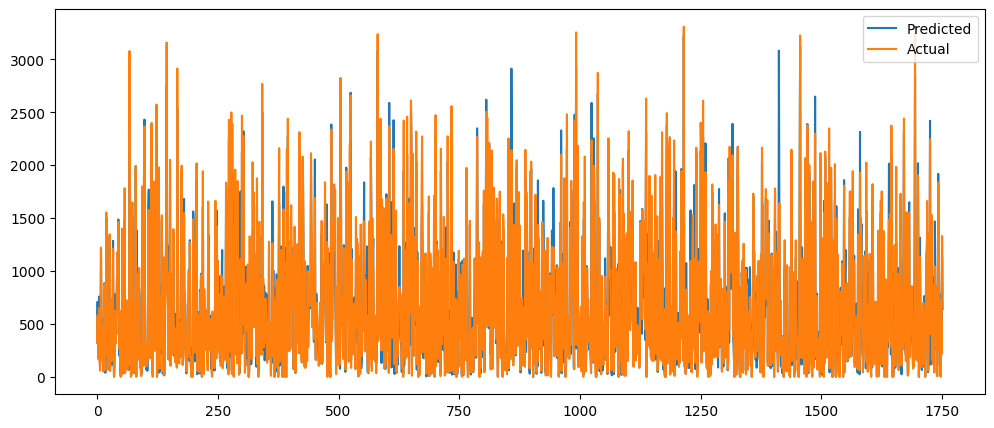

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(np.square(y_pred_test_XGB_cross))
plt.plot(np.array(np.square(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
EM = ['MAE','MSE','RMSE','r2','adjusted_r2']
train_XG_boost_cross = [train_MAE_XG_cross, train_MSE_XG_cross, train_RMSE_XG_cross, train_r2_XG_cross*100, train_adjusted_r2_XG_cross*100]
test_XG_boost_cross = [MAE_test_XG_cross,MSE_test_XG_cross,RMSE_test_XG_cross,r2_test_XG_cross*100,adjusted_r2_test_XG_cross*100]

#final dataframe of parameters
data_xg_cross = pd.DataFrame({'Evalution Parameters': EM, 'Train':train_XG_boost_cross, 'Test':test_XG_boost_cross}).set_index('Evalution Parameters')
data_xg_cross

Train          Test
Evalution Parameters                            
MAE                      75.574635    124.157093
MSE                   13529.848554  40411.901480
RMSE                    116.317877    201.027116
r2                       96.741704     90.344153
adjusted_r2              96.718286     90.060324

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV hyperparameter optimization technique which uses the Grid Search technique for finding the optimal hyperparameters to increase the model performance.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After using GridSearchCV hyperparameter optimization tuning, the model has improved, overcoming the overfitting problem.

before and after applying RandomizedSearchCV hyperparameter :-

MAE :-
the Training MAE was (72.742099), and the Testing MAE was (127.727483). However, after applying hyperparameter tuning, both the Training MAE (75.574635) and Testing MAE (124.157093).

MSE:-

Before hyperparameter tuning, the Mean Squared Error (MSE) values were Training MSE (13113.579234) and Testing MSE (42398.807816). However, after applying hyperparameter tuning, the Training MSE is now (13529.848554), and the Testing MSE is (40411.901480).

RMSE:-

The Root Mean Squared Error (RMSE) values before hyperparameter tuning were Training RMSE (114.514537) and Testing RMSE (205.909708). After applying hyperparameter tuning, the Training RMSE is now (116.317877), and the Testing RMSE is (201.027116).

R2 scores:-

before hyperparameter tuning were Training R2 (96.841951) and Testing R2 (89.869410). After applying hyperparameter tuning, the Training R2 is now (96.741704), and the Testing R2 is (90.344153).

Adjusted R2 scores:-

Before hyperparameter tuning, the Adjusted R2 scores were Training Adjusted R2 (96.819254) and Testing Adjusted R2 (89.571627). However, after applying hyperparameter tuning, the Training Adjusted R2 is now (96.718286), and the Testing Adjusted R2 is (90.060324).

Overall, XGBoost is performing very well. We can observe that our model's performance has improved significantly after applying RandomizedSearchCV for hyperparameter tuning, but overall, XGBoost is working well

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I would like to consider MAE,RMSE,R2 and Adjusted R2.

MAE:-

MAE is a metric for evaluating the performance of regression models. It measures the average absolute difference between the predicted values and the actual (observed) values in a dataset.

RMSE:-

RMSE measures the square root of the average of the squared differences between predicted values and actual (observed) values.

R2:-

R2 score is a measure of how well the model fits the data.it ranges from 0 to 1, with a higher value indicating a better fit which means that the model is able to explain a large portion of the variance in the data which could have a positive impact on decision-making.

Adjusted_r2:-

The adjusted R-squared takes into account the number of predictors (independent variables) in the model. It penalizes models with more predictors, which helps in preventing overfitting. This is particularly important when you're dealing with multiple features and you want to find a balance between model complexity and explanatory power.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I would like to choose the XGBoost as my final model because it is providing good training and testing scores in terms of R-squared (R²) and adjusted R-squared (adjusted R²) metrics. Additionally, it exhibits low errors in terms of Mean Absolute Error (MAE) and Root Mean Square Error (RMSE), which can be beneficial for business prediction.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

I am using XGBoost model for model explainability.

In [ ]:
!pip install shap

In [ ]:
import shap

In [ ]:
explainer = shap.Explainer(XGB.best_estimator_)
shap_values = explainer(X_test)

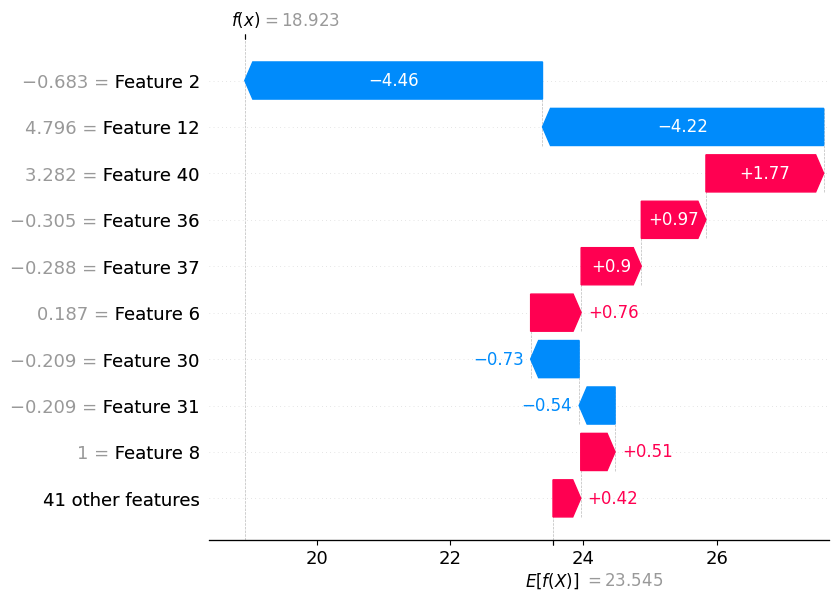

In [ ]:
shap.plots.waterfall(shap_values[0])

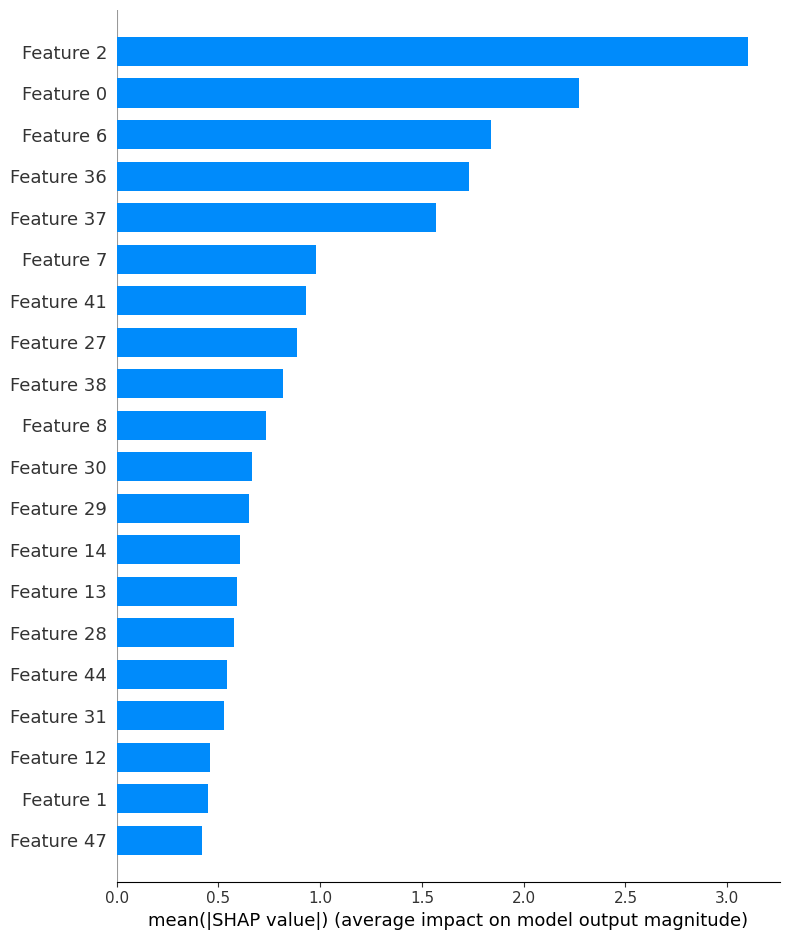

In [ ]:
shap.summary_plot(shap_values, X_train, plot_type="bar")

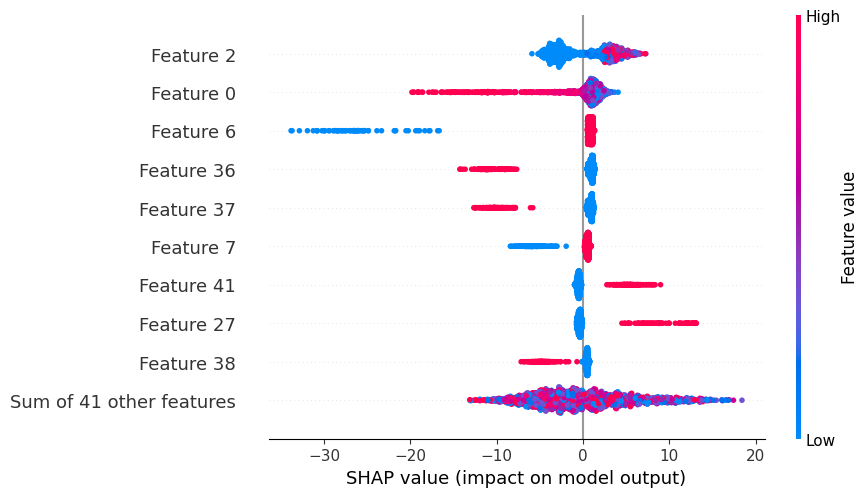

In [ ]:
shap.plots.beeswarm(shap_values)

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File
import pickle

new_data = '/content/drive/MyDrive/SeoulBikeData.csv.pkl'
pickle.dump(Random_fr, open(new_data, 'wb'))

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.
new_data = '/content/drive/MyDrive/SeoulBikeData.csv.pkl'
Seoul_bike_data_project_file = pickle.load(open(new_data, 'rb'))

In [ ]:
Seoul_bike_data = Seoul_bike_data_project_file.predict(X_test)
r2_score(y_test,Seoul_bike_data)*100

90.18698433024802

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

I started with data wrangling, then I performed exploratory data analysis (EDA) on all the variables in the dataset. During the analysis, I observed some skewness and applied the np.sqrt function to make my dependent variable normally distributed. Additionally, I conducted EDA on both my continuous variables and categorical columns.

I used three machine learning models—Linear Regression, RandomForestRegressor, and XGBoost. Among them, XGBoost performed the best in our models.That's why i want to use XGboost algorithm for my future prediction.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***